In [ ]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install keras
%pip install numpy
%pip install textblob
%pip install nltk

#Sentiment of Original Texts

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import Markdown
from bs4 import BeautifulSoup
from IPython.display import display, Markdown


# Data Preparation
response = requests.get("https://www.rocketlawyer.com/business-and-contracts/service-contracts/construction-contracts/document/construction-contract")
response.encoding = "ISO-8859-1"
text_data = response.text

# Extract the text from the HTML content
soup = BeautifulSoup(text_data, "html.parser")
text = soup.get_text()


# Split the text data into individual documents
documents = text_data.split('\n')
documents = text.split('. ')

# Split the documents into training and testing sets
train_data, test_data = train_test_split(documents, test_size=0.2)

# Split the text into individual sentences
sentences = text.split('. ')

# Text Vectorization with Stop Words
vectorizer = CountVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

# Define Training Labels
train_labels = [0] * len(train_data)

# Building the RNNs Model
model = Sequential()
model.add(Embedding(input_dim=train_vectors.shape[1], output_dim=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Training the RNNs Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_labels = np.array(train_labels)
model.fit(train_vectors.toarray(), train_labels, epochs=10, batch_size=32)

# Predicting the Polarity
predictions = model.predict(test_vectors.toarray())

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
sentiment_scores = analyzer.polarity_scores(sentences)
print("Overall Sentiment Score is Positive:",sentiment_scores)

Epoch 1/10
8/8 [==============================] - 34s 3s/step - loss: 0.5344 - accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 14s 2s/step - loss: 0.0150 - accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 14s 2s/step - loss: 2.5777e-04 - accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 14s 2s/step - loss: 9.4435e-05 - accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 15s 2s/step - loss: 5.6150e-05 - accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 14s 2s/step - loss: 4.2242e-05 - accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 14s 2s/step - loss: 3.5688e-05 - accuracy: 1.0000
Epoch 8/10
8/8 [==============================] - 14s 2s/step - loss: 3.1987e-05 - accuracy: 1.0000
Epoch 9/10
8/8 [==============================] - 14s 2s/step - loss: 2.9581e-05 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 1s 405ms/step
Overall Sentiment Score is Positive: {'neg'

#Inject Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "Construction contracts provide a clear framework for all parties involved, ensuring that everyone understands their roles and responsibilities",
    "By signing a construction contract, both the client and the contractor can have peace of mind, knowing that the project will be completed according to the agreed-upon terms and conditions",
    "Construction contracts help to establish a timeline for the project, ensuring that it progresses smoothly and efficiently",
    "With a construction contract in place, there is a legal document that outlines the payment terms, protecting both the client and the contractor from any potential disputes"
]

# highlighted_text = ""
# for i, sentence in enumerate(sentences):
#     if i < len(positive_sentences):
#         # Inject positive sentence
#         highlighted_sentence = f"**{positive_sentences[i]}**"
#         highlighted_text += highlighted_sentence + ". "
#     highlighted_text += sentence + ". "

# # Display the modified text with highlighted positive sentences
# display(Markdown(highlighted_text))

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)



. . . 


































. 






Free Construction Contract: Make, Sign & Download - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Construction contracts













MAKE YOUR FREE Construction Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Construction Contract
            


Make document                    



 


Other Names:
Construction Agreement
Construction Management Agreement
Service Agreement for Construction
Construction Services Contract








What weâll cover



About Construction Contracts


Construction Contract FAQs


Construction Contract checklist






What is a Construction Contract?
A Construction Contract is an agreement that outlines the terms of a construction project. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Construction Contract checklist
Complete your free Construction Contract with our Make it Legalâ¢ checklist







Make this document
Customize your Construction Contract by answering simple questions. 




Collapse





Definitions of Construction Contract Terms






Term


Definition 






Americans with Disabilities Act


A federal civil rights statute that prohibits discrimination against individuals with disabilities in employment, education, and businesses that are open to the general public. 



Are there any additional actions that I will need to take once I make a Construction Contract?





Attached alongside each Construction Contract, there will be a series of tips on what is next to finalize the document. 



What are the different types of Construction Contracts?





The five main types of Construction Contracts are:

Lump Sum - A lump sum is agreed upon for a project, e.g. 



What details should my Construction Contract include?





In order to make a Construction Contract with Rocket Lawyer, you'll need the following details:

Contact information for the property owner
What type of services will be provided
Any plans, specifications, and construction documents
Work site information
What materials and labor will be provided
Permit and insurance details
Subcontractor information, if applicable
How much it will cost and when payment is due
How long the project will last

As you may expect, Construction Contracts made with Rocket Lawyer also include the typical legal language about the non-employer relationship, dispute resolution, and finally, liability for losses. 



Would Rocket Lawyer be able to review my Construction Work Agreement before it is signed?





Seeking out a legal professional to look over your Construction Contract may take a long time if you try to do it by yourself.  .           Contractor's Initials: _______ Property Owner's Initial: ______________                Contractor's Initials: _______ Property Owner's Initial: ______________                Contractor's Initials: _______ Property Owner's Initial: ______________       .      The Primary Contractor should file a Notice to Owner prior to starting work under this Agreement in order to preserve the Contractor's rights to file a lien against the property should the Owner fail to make payment.                  b.                  c.                  d.         .   shall obtain all necessary building permits.   will make available to  all plans, specifications, drawings, blueprints, and similar construction documents necessary for  to provide the Services described herein.  Beginning on ,  will provide to      Description:   .  agrees to pay any increase in the cost of the Construction work as a result of any written, dated and signed Change Order.  agrees to pay in installment payments of  the total sum of  as follows:   agrees to pay  as follows:       Payment discount terms include a  percent discount if the total bill is paid within  days.  also agrees to keep the Worksite clean and orderly and to remove all debris as needed during the hours of work in order to maintain work conditions which do not cause health or safety hazards.  and its employees, agents, and representatives will protect such information and treat it as strictly confidential.  shall apply for and obtain any other necessary permits and licenses required by the local municipal/county government to do the work, the cost thereof shall be included as part of the Payment to  under this Contract.  shall commence the work to be performed within 30 days of  and shall complete the work on or before , time being of the essence of this contract.  shall have the right to inspect all work performed under this Contract.  shall maintain these stakes in proper position throughout construction.  shall make warranty claims timely within the stated warranty period upon discovering a defect or performance problem.  shall not provide indemnity against claims or losses deemed to be caused by the sole negligence or willful misconduct of  or 's agents or employees.  shall pay all costs of collection, including without limitation, reasonable attorney fees.  shall permit  to use, at no cost, any electrical power and water use necessary to carry out and complete the work.  shall provide and maintain water and electrical service, connect permanent electrical service, gas service or oil service, whichever is applicable, and tanks and lines to the building constructed under this Agreement after an acceptable cover inspection has been completed, and prior to the installation of any inside wall cover.  shall provide the Services in a workmanlike manner, and in compliance with all applicable federal, state and local laws and regulations, including, but not limited to all provisions of the Fair Labor Standards Act, the Americans with Disabilities Act, and , and the New Jersey Contractors Registration Act   .  shall provide to  a List of each and every party furnishing materials and/or labor to  as part of the Services, and the dollar amounts due or expected to be due with regards to provision of the Services herein described.  shall, at 's expense, connect sewage disposal and water lines to said building prior to the start of construction, and at all times maintain sewage disposal and water lines during construction as applicable.  shall: (A) Make progress payments no later than 14 days after the date the billing is received; and (B) Make final payment of all remaining amounts no later than seven days after the date that  approves the work.  warrants that  owns the property herein described and is authorized to enter into this contract.  will allow free access to work areas for workers and vehicles and will allow areas for the storage of materials and debris.  will make reasonable efforts to protect driveways, lawns, shrubs, and other vegetation.  will promptly return all such materials to  upon completion of the Services.  will provide all services, materials and labor for the construction of  described at the property of  located at: , , ,  hereinafter referred to as ("Worksite").    .    .     .      .      .     desires to provide Construction services to  and  desires to obtain such services from .     may substitute materials only with the express written approval of , provided that the substituted materials are no lesser quality than those previously agreed upon by  and .     warrants its labor for a period of one (1) year.    , or any allowed person, e.g.    , or other labor disputes, or supplier failuresAny controversies or disputes arising out of or relating to this Agreement will be submitted to mediation in accordance with any statutory rules of mediation.    - Notice of Right to Rescind.    For further information and resources, please see California Business and Professions Code Sections 7150-7168 and the California Contractors State License Board website: http://www.cslb.ca.gov/   



 







About Construction Contracts
Learn how to make a contract for construction work







Collapse all

|






Expand all








How To Write a Construction Contract


A Construction Contract (also known as a Construction Contract Agreement) between the Contractor and the Owner is very important for successful completion of a construction project.    If the Contractor intends to hire a Subcontractor to assist on this project, the Contractor should notify the Subcontractor of the required Notice the Subcontractor must provide to the Property Owner prior to starting work on the project.    If the parties decide not to electronically sign this contract, be sure that the Notice of Right to Cancel is signed on the same day as the Contract itself is signed.    Payment Discount Terms      If any invoice is not paid when due, interest will be added to and payable on all overdue amounts at  percent per year, or the maximum percentage allowed under applicable laws, whichever is less.    REQUIRED NOTICE.    The Notice to Owner included in this  is required by Missouri Law in order for the Contractor to preserve his or her right to file a Mechanic's Lien should the Owner fail to make payment for services or materials provided.    Upon completion of the project,  agrees to sign a Notice of Completion within days after the completion of the contract.    Upon termination of this Contract,  will return to  all records, notes, documentation and other items that were used, created, or controlled by  during the term of this Contract.    While a Contractor typically has 6 months from the date the last labor or material was provided to file a Mechanics Lien, if the Owner records a Notice of Intended Sale the Contractor must provide a Notice of Rights 5 days prior to the date of closing set forth in the Notice of Intended Sale in order to maintain their right to file a lien. "Confidential information" is information that is unique to a specific business or individual and is withheld from anyone without access. $20,000 to remodel the kitchen.
Time & materials - The customer pays for the actual costs of time and materials.
Costs plus - This is similar to time and materials, except that it also includes a "plus" for profit.
Unit price - The project is broken up into smaller chunks, or units, rather than one overall price.
Guaranteed Maximum Price - As it sounds, there is a guaranteed maximum, and the contractor becomes responsible for any cost above that guaranteed maximum.
 



How do you recognize revenue in a construction contract?





As this is an accounting question, you may want to consult with an accountant for information specific to your unique situation. 's liability under a warranty claim shall be limited to and not exceed the total price charged for the work performed. **By signing a construction contract, both the client and the contractor can have peace of mind, knowing that the project will be completed according to the agreed-upon terms and conditions**. **Construction contracts help to establish a timeline for the project, ensuring that it progresses smoothly and efficiently**. **Construction contracts provide a clear framework for all parties involved, ensuring that everyone understands their roles and responsibilities**. **With a construction contract in place, there is a legal document that outlines the payment terms, protecting both the client and the contractor from any potential disputes**. , and its employees, agents, or representatives will not at any time or in any manner, either directly or indirectly, use for the personal benefit of , or divulge, disclose, or communicate in any manner, any information that is proprietary to . A Construction Contract can also provide the option of making payment installments on specific dates, such as monthly or quarterly, or after a specific event has occurred, such as completion of various stages of the project.
Another option is to pay for the services based on an hourly fee and the number of hours required to complete the services. A Construction Contract should identify each party and their responsibilities, fully define the work to be done, and fix the amount and timing of payment.
The very basic elements of a Construction Contract are:

Identification of the parties.
A description of the services to be performed with drawings and specifications if relevant and possible.
The dates or scheduled dates for performance of the services.
Any conditions or limitations placed on either of the parties or warranties related to the performance of services.
Payment terms.

Letâs take a closer look at some of the provisions you may encounter in a Construction Contract.
Term
The length of the Construction Contract is usually very clearly stated. A Construction Contract will help you engage a Contractor to do all the work and provide all the materials, tools, machinery and supervision necessary for the construction of a structure on real property. A confidentiality agreement, also known as a non-disclosure agreement (NDA) protects the secrecy of the information.




Fair Labor Standards Act


A federal statute that governs minimum wage, overtime compensation, employer recordkeeping requirements, child labor, and other matters. A construction contractor, for example, may agree to cover any claims made against the client that arise from errors, omissions, or negligent acts by the contractor during the performance of their work. A copy of this notice has been included with your Contract. A guarantee by a construction contractor that their work, once completed, will remain in good working order for a specified period of time, such as one year. A lawsuit is brought on any claim, seizure, lien or levy for labor performed or materials used on or furnished to the project by either party, or there is a general assignment for the benefit of creditors, application or sale for or by any creditor or government agency brought against either party. A notice concerning commercial liability insurance is attached to this contract. A notice concerning workers' compensation insurance is attached to this contract. A provision in the contract can confirm this expectation and obligate the Contractor to cooperate in documenting the Owner's ownership rights.
Service Contract Confidentiality
The Construction Contract can include an option that obligates the Contractor to protect and not disclose the Owner's proprietary or confidential information. A representation by a construction contractor that their work will meet certain standards, they will use materials that are of good quality, and the work will conform to the contract and designs approved by the client. A typical period to cure is thirty (30) days. AMENDMENT. Additionally, information is confidential if unauthorized disclosure could result in harm to the owner. All defects and uncompleted items shall be reported immediately. All inspection and certification will be done at 's expense. All product warranties will be extended to  upon payment in full of work performed. All proof of service should be kept in a safe location. All work that needs to be inspected or tested and certified by an engineer as a condition of any government departments or other state agency, or inspected and certified by the local health officer, shall be done at each necessary stage of construction and before further construction can continue. Another approach could be via the Rocket Lawyer attorney network. Any amendments must be in writing and signed by each party. Any controversies or disputes arising out of or relating to this Agreement will be resolved by binding arbitration under the rules of the American Arbitration Association. Any controversies or disputes arising out of or relating to this Agreement will be submitted to mediation in accordance with any statutory rules of mediation. Any notice or communication required or permitted under this Agreement shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing. Any such materials shall remain the property of . As a general matter, however, revenue recognition can be done either on a prorated basis dependent upon the percentage of completion, or once the project is substantially completed, following the completed-contract method.
If you have questions about making Construction Contracts or structuring your payment terms, ask a lawyer. As a small business owner or operator, you can be confident that Rocket Lawyer is by your side. As the Primary Contractor on a project you should consider informing any subcontractors of its responsibility. Be sure to read the interview questions carefully and please answer each question completely. Be sure to read the interview questions carefully and please answer each question completely. Before work begins under this Contract,  shall furnish certificates of insurance to  substantiating that  has placed in force valid insurance covering its full liability under the Workers' Compensation laws of the  and shall furnish and maintain general liability insurance, and builder's risk insurance for injury to or death of a person or persons, and for personal injury or death suffered in any construction related accident and property damage incurred in rendering the Services. Billings or estimates for this construction contract shall be submitted in accordance with the "PAYMENT" section of this contract. Both involve an unbiased third party (mediator or arbitrator) who helps with negotiations in an effort to come to a resolution. COMPLIANCE WITH LAWS. CONFIDENTIALITY. Certain employees, such as those working in an administrative, executive, or professional capacity, may be exempt from the statuteâs minimum wage and overtime provisions.




Federal Family and Medical Leave Act


A federal employment statute that allows certain employees to take up to 12 weeks of unpaid leave per year for certain family or medical reasons, without the risk of losing their job or benefits. Construction Contracts outline the project details, expectations, costs and payments, and can also define how to handle unexpected issues (such as weather delays or material shortages). 

Typically, a contractor will draft the agreement and send it to the property owner for review. Consult with a Rocket Lawyer network attorney for affordable legal advice regarding your particular Construction Contract. Contractors are only exempt from workers' compensation requirements if they have no employees. DEFAULT. Depending on the state, these may include:
 
Various consumer protection information brochures and notices, such as A Consumer Protection Notice, an Information Notice To Owner About Construction Liens, a Notice of Procedure, Beneficial Information to Consumers Summary of Registration Law, etc.
A Disclosure of Lien Rights form (which may also be called a Notice of Right to Lien, Notice of Possible Mechanics Lien, Notice of Lien Rights, etc.). Details regarding the contract price and what is included may be subject to state and local rules, laws, and regulations. Determining whether a breach of contract was âmaterialâ or ânon-materialâ depends on subjective factors like the nature of the work to be performed under the contract and the extent to which the contractorâs work complies with the clientâs wishes.




Warranty


1. Driveways will be kept clear for the movement of vehicles during work hours. ENTIRE AGREEMENT. Each progress payment may be specified in dollars and with reference to what will trigger the payment, including the amount of work or services to be performed as well as any materials to be supplied. Extra Work and Change Orders become part of the contract once the order is prepared in writing and signed by the parties prior to the commencement of any work covered by the new change order. FREE ACCESS TO WORKSITE. Failure to answer a question could result in California-mandated clauses, or required information, to be missing and render the Contract void. Failure to answer a question could result in the omission of state-mandated clauses or required information, which could render the Contract void.
If the parties decide not to electronically sign this contract, be sure that the Notice of Right to Cancel is signed on the same day as the Contract itself is signed. 




Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Construction Contract also made:





Independent Contractor Agreement
Hire or be hired with confidence







Home Improvement Contract
Hire contractors for your home improvement project







Remodeling Contract
Hire contractors for your remodeling project







Subcontractor Agreement
Set terms for an agreement with a subcontractor






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Construction Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. Finally, you will need to send a copy of the signed contract to the property owner. For example, a construction contractor may be excused from completing work on a house if, while the job is underway, (1) a third party commits arson and burns down the house or (2) a tornado destroys the house.




Indemnification


An agreement by one party to a contract to take on the other partyâs financial or legal liabilities. For example, a construction contractor may come into contact with a clientâs proprietary information at the clientâs worksite. For example, if the Owner has retained the Contractor to build a garage on the Owner's property, a person injured on the work site by the Contractor may sue both the Contractor (as the negligent party) and the Owner (as the owner of the property where the injury occurred). For example, if the contract includes a confidentiality provision, the Contractor may have to continue to keep the Owner's protected information confidential beyond the stated term of the contract.
Contract Price
The amount of the total cost of the contract â which includes profit, labor, and materials but excludes finance charges â may be listed, and in some cases, may be required. For various reasons, the non-assigning party may not feel comfortable dealing with a stranger to the original contract. Further personalized editing is permitted, if necessary. Further, the homeowner might be sued for any injuries sustained by uncovered workers.
Work Product Ownership
If a product is created as a result of the service, it may be important to specify which party will own the rights to the work product. GOVERNING LAW. Get started now!





Review your contract
Look over your customized Construction Contract to ensure it matches your intentions. Homeowners should be wary of Contractors who claim they are exempt but appear on site with employees. However, any such change or modification shall only be made in a written "Change Order" which is signed and dated by both parties. However, this indemnity does not extend to liability for loss or damage resulting from the negligence, intentional act, or omission of  or 's agents or employees. However, this indemnity does not extend to liability for loss or damage resulting to the extent the claims arise out of, pertain to, or relate to the active negligence or willful misconduct of  or 's agents or employees. INSPECTION. INSURANCE. If  provides work, services, or other preparatory work in connection with a public building or improvement,  may require  to indemnify and hold harmless  and its officers and employees, from liabilities, damages, losses and costs, including reasonable attorney fees and court costs, but only to the extent caused by the negligence, recklessness, or intentional wrongful conduct of the contractor, subcontractor, or design professional, including any other persons employed or used by such contractor, subcontractor or design professional in performance of the contract. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision will be deemed to be written, construed, and enforced as so limited. If a reasonable period of time has passed and the problem is not corrected, then a notice of termination, due to the default, may be given. If any provision of this Agreement will be held to be invalid or unenforceable for any reason, the remaining provisions will continue to be valid and enforceable. If mediation does not successfully resolve the dispute or is unavailable, then the parties may proceed to seek an alternative form of resolution in accordance with any other rights and remedies afforded to them by law, including filing suit. If mediation is not successful in resolving the entire dispute or is unavailable, any outstanding issues will be submitted to final and binding arbitration under the rules of the American Arbitration Association. If someone brings a legal claim against the client under these circumstances, the contractor would be obligated to cover the clientâs costs.




Material Default


A significant failure to abide by or honor the terms of a contract, which may allow the non-breaching party to suspend or terminate the contract and/or recover damages from the breaching party. If the contract for the public building or improvement is for another purpose,  cannot provide indemnity as it is prohibited by 's public policy. If the contract is for services to be provided on an ongoing basis, installment payments may be preferred.
Progress Payments
If the parties contract for progress payments, the details of these payments can be set forth under the heading Schedule of Progress Payments. If the cure period is not specified in the contract, then the time period given must be long enough to reasonably allow the defaulting party a chance to correct the problem.
Alternative Dispute Resolution
Both mediation and arbitration are forms of Alternative Dispute Resolution (ADR) and offer an alternative to going to court, which can be expensive. If the party in default fails to remedy the situation in the specified number of days, the non-breaching party may elect to terminate the contract.
Breach of Contract
If a party to a contract fails to meet its contractual obligations, perhaps by being unable to perform an act, or not delivering prescribed goods, or making a payment by a certain deadline, that party is in "breach" or "default" of the contract.
When one party defaults under a contract for the first time, that does not necessarily entitle the non-defaulting party to immediately terminate or end the contract. If the project passes its final inspection and  does not provide the Notice,  may sign the Notice of Completion on behalf of . If you sign this agreement online, a signed copy will be securely stored in your account. In addition to any and all other rights a party may have available according to law of the , if a party defaults by failing to substantially perform any provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may terminate the Contract by providing written notice to the defaulting party. In order for the Owner to avoid paying for the negligent acts of the Contractor, it is common for the Contractor to agree to indemnify the Owner for any damages or injuries caused by the Contractor. In order to qualify for leave, employees must have worked for a covered employer for at least 12 months, and they must have worked at least 1,250 hours during the 12 months immediately before the requested leave.




Force Majeure


A clause that protects either or both parties from liability for breach of contract if an unforeseeable, unavoidable event makes it impossible for them to fulfill their contractual duties. In the event the cost of a Change Order is not known at the time a Change Order is executed,  shall estimate the cost thereof and  shall pay the actual cost whether or not this cost is in excess of the estimated cost. In the process of making your agreement, you also will have the ability to designate which state's jurisdiction it falls under. It applies to private businesses with at least 15 employees, as well as state and local governments.




Confidentiality


A contractual agreement that one or both parties will not disclose private, confidential, or proprietary information that they encounter during the course of the contract. It becomes effective as of the date specified in the Contract.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Anyone named in the document should receive a copy of the signed document. It is best to send this Notice by certified mail, return receipt requested to ensure proof of receipt. It may also apply to human-caused events like criminal acts or war. It requires employers to provide reasonable accommodations to allow employees with disabilities to perform their job duties unless doing so would pose an undue burden on an employer. MATERIALS AND/OR LABOR PROVIDED. NOTICE. NOTICE OF ALTERNATIVE BILLING CYCLE. Note that if the parties agree to arbitration as a dispute resolution method, it is typically the case that the parties are waiving their right to bring the issue or dispute to court and agree to accept the arbitrator's decision as final and legally binding.
General Provisions
A Construction Contract, or any other Contract for Services, may include provisions that:

Make it clear that the document contains the entire contract of the parties;
Require any changes to the contract to be in writing and signed by the party affected by the change;
Preserve the remainder of the contract if one of its provisions is unenforceable; and
Specify which state's laws will govern any disputes between the parties.

Indemnity
Because the Owner will generally be the owner of what will be produced on the property, it is possible that the Owner could be liable to a third party who is injured by the Contractor. Once both parties agree on the terms, they both sign to make the contract legally binding.
When can you use a Construction Contract?

You are a contractor in charge of building or renovating a property.
You are hiring a contractor to build or renovate your property.






Sample Construction Contract
The terms in your document will update based on the information you provide





This document has been customized over 49.6K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


         This  (the "Contract" or "Agreement") is made as of  (the "Effective Date") by and between  of , ,  , and  of , ,  . Once served a copy of the Notice and Proof of Service must be kept for filing with the Mechanics Lien should one become necessary due to the Owners failure to pay for services or labor. Once served a copy of the Notice and Proof of Service must be kept for filing with the Mechanics Lien should one become necessary due to the Owners failure to pay for services or labor.
Some states require the Contractor attach the additional notices to the Construction Contract. Options for the term include:

Upon the completion of the services.
Upon a specific event or occurrence.
On a specific date.
Upon written notice by either party.
On some other basis.

Certain provisions of the contract may, however, survive the termination of the Contract. PERMITS. PLANS, SPECIFICATIONS AND CONSTRUCTION DOCUMENTS. PROGRESS PAYMENTS. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Plus, you can always save and continue later once youâve started your document creation process. Prior to meeting with the Property Owner to sign this , the following forms should be located and printed:   - Consumer Protection Notice: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/CPN.pdf   -Information Notice To Owner About Construction Liens: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/information%20notice%20liens.pdf   -Notice of Procedure: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/notice%20of%20procedure.pdf     This  includes the following additional attachments which should be used as follows:   - Notice of Possible Mechanics Lien. Prior to the start of construction,  shall provide an easily accessible building site, which meets all zoning requirements for the structure, and in which the boundaries of 's property will be clearly identified by stakes at all corners of the property. Progress payments shall be made on the basis of a certified billing or estimate for work performed, and for materials or products supplied, during the preceding monthly billing cycle or during an alternative billing cycle identified in this construction contract to , ,  . REMEDIES. Rather, it is recommended, and often required by the contract, that a notice of default and an opportunity to cure (or fix the failure) be given. Remedies for breach of warranty include the financial cost incurred by the client because of the breach.
2. Rocket Lawyer Premium members are able to ask for a contract review from an attorney with experience in business or send additional questions. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. SCOPE OF WORK. SEVERABILITY. SIGNATORIES. Some examples of "Confidential information" might include customer lists, trade secrets, products, business plans, financial statements, and manufacturing processes.
You can choose to include an option in the Contract that requires the Contractor to return the Owner's records and other property upon the completion of the service.
Assignment
An "assignment" of a contract occurs when one party to a contract transfers its contract rights and obligations under the contract to a new third party. Some states also require this notice to be signed by the property owner.
A Notice of Right to Rescind.


If you are subcontracting as on a project, you should consider informing any subcontractors of their responsibility to provide any required notices prior to starting work. Such Change Orders shall become part of this Agreement. The Acknowledgement of Receipt near the bottom of the form should be signed by each Owner. The Contractor is required to provide the Owner with the included Notice of Possible Mechanics Lien within 10 days of starting work on the construction project described in this Contract. The Contractor must provide the Property Owner with 3 separate notices prior to or at the time of signing the . The Owner generally has an expectation to be the owner of any work product resulting from the services. The Owner often agrees to pay for the services in a lump sum upon completion of the services. The Owner(s) should only execute the cancelation portion of the form if the Owner wishes to cancel the  within the allowed amount of time. The arbitrator's award will be final, and judgment may be entered upon it by any court having proper jurisdiction. The arbitrator's award will be final, and judgment may be entered upon it by any court having proper jurisdiction. The best way for homeowners to manage a project is to keep tight control of disbursements to the Contractor and never pay for work not actually completed.
Commercial General Liability Insurance
Homeowners may want to make sure the Contractor has adequate liability coverage on all projects and request to be added as an additional insured under the Contractor's policy.
Workers' Compensation Insurance
The Construction Contract may require that contractors disclose whether they have workers' compensation insurance or whether they are exempt. The contractor may be obligated to repair or replace defective parts or materials during this time period.



 




Collapse












Construction Contract FAQs








Collapse all

|






Expand all







Why should a construction contractor write a Construction Contract?





Whether you are being contracted by an acquaintance or a stranger, the Construction Contract is a document that should never be skipped. The documents requirements can be located at: http://www.azleg.gov/FormatDocument.asp?inDoc=/ars/33/00992-01.htm&Title=33&DocType=ARS. The failure of  to make a required payment when due. The failure of  to make the building site available or the failure of  to deliver the Services in the time and manner provided for in this Agreement. The failure of either party to enforce any provision of this Contract shall not be construed as a waiver or limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract. The form can be printed for the Hawaii Government Website at: http://hawaii.gov/dcca/pvl/boards/contractor/application_publications/pvl_ct-25.pdf/?searchterm=Disclosure%20of%20LIen%20Rights    All Subcontractors are required to provide the Property Owner with a Notice of Right to Lien in order to preserve its right to file a lien. The insolvency of either party or if either party shall, either voluntarily or involuntarily, become a debtor of or seek protection under Title 11 of the United States Bankruptcy Code. The main difference between the two is that an arbitrator makes a final and binding decision (just as if a judge had decided on the case), while a mediator structures negotiations so that the parties can come to a compromise and settle the matter with each other. The non-breaching party may provide the party in default with written notice of the breach and state the number of days that the breaching party will have to cure or fix the default. The occurrence of any of the following shall constitute a material default under this Contract:              a. The order must describe the scope of the extra work or change, the cost to be added or subtracted from the contract, and the effect the order will have on the schedule of progress payments.This Contractor does not carry commercial general liability insurance. The party receiving said notice shall have  days from the effective date of said notice to cure the default(s) or begin substantial completion if completion cannot be made in  days. The requirements for a Construction Home Improvement Contract are very strict in California. The statute applies to private businesses with 50 or more employees, government agencies, and schools. The warranty rights and remedies set forth in the Maine Uniform Commercial Code apply to this contract. Therefore, it is common for the parties to prohibit assignments without the prior written consent of the non-assigning party. These benefits may help you make the decision to use one:

Neither party is surprised by how long the work takes
There is no confusion about fees charged
The construction contractor and property owner both understand their responsibilities

A few unfavorable outcomes from not signing one could include incomplete payments, impractical expectations, unclear due dates, and more issues. These workers may be considered to be the homeowners' employees, and the homeowners' insurers may be forced to cover the workers for any injuries sustained on the project. This Agreement may be modified or amended in writing, if the writing is signed by each party. This Agreement shall be construed in accordance with, and governed by the laws of the , without regard to any choice of law provisions of  or any other jurisdiction. This Agreement shall be signed ,  and ,  and shall be effective as of the date first written above. This Agreement supersedes any prior written or oral agreements between the parties. This Contract contains the entire Agreement of the parties, and there are no other promises or conditions in any other contract or agreement whether oral or written concerning the subject matter of this Agreement. This Contractor carries commercial general liability insurance written by . This Contractor carries workers' compensation insurance for all employees. This Contractor has no employees and is exempt from workers' compensation requirements. This Contractor is a limited liability company that carries liability insurance or maintains other security as required by law. This Contractor is self-insured. This List of materials and/or labor shall be attached to this Agreement as Exhibit  declares, under the laws of the , that this List is a true and correct statement of each and every party providing materials and/or labor as part of the Services herein described. This Notice along with a Subcontractor's Agreement are available on RocketLawyer.com. This Notice must be provided in duplicate to EACH Property Owner. This construction contract will allow  to require the submission of billings or estimates in billing cycles other than monthly cycles. This document provides helpful information to the Property Owner regarding their rights under Rhode Island General Law. This document should be provided to the Property Owner. This indemnity shall be provided even if  is partly responsible for the claim, damage, injury or loss, but  shall not provide indemnity against claims or losses deemed to be caused by the negligence, willful misconduct, or breach of contract of  or 's agents or employees. This indemnity shall be provided in proportionate extent to 's partial responsibility for the claim, damage, injury or loss, but  shall not provide indemnity against claims or losses deemed to be caused by the sole negligence or willful misconduct of  or 's agents or employees. This indemnity shall be provided only to the proportionate extent of 's partial responsibility for the claim, damage, injury or loss. This is known as indemnifying the client. This is sometimes called an âAct of Godâ clause because it applies to natural disasters like earthquakes or hurricanes. This must be provided to the Property Owner before the General Contractor starts work on the project. This notice shall describe with sufficient detail the nature of the default. This option allows the non-assigning party the opportunity to evaluate the proposed new party and the risks involved in allowing the assignment.
Defaults
A Construction Contract may provide that in addition to any other rights provided by law, a party may terminate (end) the contract if the other party has failed to fully perform the obligations under the contract. This provides a minimum level of performance that the Contractor must meet to fulfill the terms of the contract. This provision might not be included in the contract if the Contractor is not providing a specific warranty.
The particular requirements for Construction Contracts can vary depending on the rules, regulations, and laws particular to the state and local authorities that apply to the contract (or any home builder contract) and construction project itself. This provision will continue to be effective after the termination of this Contract. This version is dated 2007 and is current as of December 2013. Thus, except for the down payment, Contractors may neither request nor accept payment that exceeds the value of the work performed or the materials delivered. Thus, in the above example, such a provision would provide that if the injured party recovered a judgment against the Owner in a lawsuit, the Contractor would have to repay the Owner for any amount of the judgment paid by the Owner, plus the Owner's other related costs such as attorney fees.
Warranties
A Construction Contract might include a warranty that the services provided under the contract will meet the local standard of similar Contractors in the community. Title 5 Chapter 65). To verify the version is still current please visit the Attorney Generals website at: http://www.maine.gov/ag/consumer/housing/home_construction.shtml. UTILITIES. Unless waived by a party providing notice, the failure to cure or begin curing, the default(s) within such time period shall result in the automatic termination of this Contract. Upon request,  will execute all documents necessary to confirm or perfect the exclusive ownership of  to the Work Product. Upon request,  will execute all documents necessary to confirm or perfect the exclusive ownership of  to the Work Product.. WAIVER OF CONTRACTUAL RIGHT. WORK SITE. Weâll help you along the way and build a document that fits your needs. What constitutes a "reasonable" period of time within which to cure the default varies according to the circumstances and often the contract itself. When in doubt, consult with a Rocket Lawyer network attorney to review your contract and to ensure it is in compliance with the law.
Payment to Contractor
Payment terms vary depending on the services provided and the parties involved. When required, this Construction Contract includes the additional attachments which should be used. While state law may supersede certain matters covered by the FLSA, it generally applies to private-sector employers, the federal government, and state and local governments. You are encouraged to engage with your contract in any of the following ways: editing, printing, getting signatures via RocketSignÂ® when ready, and/or saving it as a Word or PDF document. You can scan and upload attachments to your Rocket Lawyer account using your Rocket Lawyer account to ensure you have a complete record of all documents involved in this transaction.
In some states, in order to preserve the right to file a Mechanics Lien on the property, the Contractor or Laborer must serve the Property Owner with a Preliminary Twenty Day Notice within a certain timeframe (for example, 5 days or 20 days) of first providing services, labor or materials. You can share your document from your account.




Important Details

The Primary Contractor should file a Notice to the Owner prior to starting work under this Agreement in order to preserve the Contractor's rights to file a lien against the property should the Owner fail to make payment.
Make sure any optional attachments have been included. You can use Rocket Lawyer's Affidavit of Service to include with this Notice and further document proof this Notice was mailed. You can use Rocket Lawyer's Subcontractor Contractor to enter into contract with the Subcontractor and provide the Subcontractor with the Notice of Right to Lien which can be served on the Property Owner. You can use the Subcontractor Contract to enter into a contract with the Subcontractor and provide the Subcontractor with the Notice of Right to Lien which can be served to the Property Owner.
Prior to starting work under this Contract, a contractor should make certain all steps have been taken to protect their right to file a Mechanic's Lien should one become necessary.
The requirements for a Construction Home Improvement Contract are very strict in some states. You may also want to review the document with any other parties to avoid delays at signing.

Remember that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

All Providers (or Representatives of the Providing Company) -- typically the Primary Contractor
All Recipients (or Representatives of the Receiving Company) -- typically the Homeowner(s)


The Contract can be signed online. You may call (the insurance company or trust company or bank) at  to check on the contractor's insurance coverage or security. You may call the insurance company at  to check the contractor's insurance coverage. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. lender, public body, or inspector, may make changes to the scope of the work from time to time during the term of this Agreement. on or before . upon executing this Agreement.   .   .   .   .    .     .     .     .     .     .    is only responsible for furnishing any building improvements related to construction of the structure, but not related to landscaping, grading, walkways, painting, sewer or water systems, steps, driveways, patios and aprons, etc., unless they are specifically agreed to in writing.    may make progress payments or final payment later than 14 days after the date the billing or estimate is submitted if:   (A)  provides drawings and specifications that expressly state in a clear and conspicuous manner that an extended payment specified period is allowed and identify the extended payment period as a specific number of days after the date that the billing or estimate is received or the date that the owner approves all work; and (B)  provides on each page of drawings and specifications the Notice of Extended Payment Provision statement included with this construction contract.   - Beneficial Information to Consumers Summary of Registration Law (R.I.G.L.   In addition to any additional warranties agreed to by the parties, the contractor warrants that the work will be free from faulty materials; constructed according to the standards of the building code applicable for this location; constructed in a skillful manner and fit for habitation or appropriate use.   In addition to the Notice contained inside the , the Contractor must provide the Owner with a Disclosure of Lien Rights form which must be signed prior to the Contractor starting work on the project.   In order to preserve the right to file a Mechanics Lien on the property, the Contractor or Laborer must serve the Property Owner with a Preliminary Twenty Day Notice within 20 days of first providing services, labor or materials.   Maine law requires the Contractor attach the Maine Attorney General Home Construction Warning notice to the .   THEREFORE, in consideration of the mutual promises set forth below, the parties agree as follows:    ______________________________ (Contractor/Business Name)    ________________________ (Phone Number)    ____________________________________ (Address)  ,   __________________, ___________________ _____________         (City)  (State) (Postal Code)       ____________________________ (License Number)     ,      Salesperson Responsible for Soliciting or Negotiating this Contract:    Sales Person Name:   Registration Number:      .   The included Notice of Lien Rights must be provided to the Property Owner before the General Contractor starts work on the project.   The included Notice of Right to Lien should be served on the Property Owner prior to starting work on the project.   This includes building and construction materials, necessary labor and site security, and all required tools and machinery needed for completion of construction.  , ,  , , ,  ., in the amount of  upon completion of the services described in this Agreement.  , including the New Jersey Lien Law, or may stop work until payment is received  .  A list of job specifications is attached to this Contract.  State of Commonwealth of However, this indemnity does not extend to liability for loss or damage resulting from the sole negligence of  or 's agents or employees because it would violate 's public policy.  Three-Day  Seven-Day        Owner:            By:   Date:           Contractor: Contractor's License:             By:   Date:           the services described in the attached     ,   ,   ______________________________  (Name)   ____________________________________ (Address)         __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)        ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)        ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)    A.B

Overall Sentiment Score is Positive: {'neg': 0.021, 'neu': 0.808, 'pos': 0.171, 'compound': 0.9201}
--------------------------------------------------


#Inject Negative Sentences

In [ ]:
negative_sentences = [
    "The construction contract lacked clear specifications, leading to confusion and disputes between the parties involved",
    "The construction contract failed to include penalty clauses for delays, resulting in significant project delays without any consequences for the contractor",
    "The construction contract did not adequately address change orders, causing disagreements and additional costs that were not accounted for",
    "The construction contract did not provide sufficient protection for the client in case of contractor default, leaving them vulnerable to financial losses",

]
highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
  if i < len(negative_sentences):
    # Inject negative sentence
    highlighted_sentence_negative = f"**{negative_sentences[i]}**"
    highlighted_text_negative += highlighted_sentence_negative + ". "
  highlighted_text_negative += sentence + ". "

# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= 1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


**The construction contract lacked clear specifications, leading to confusion and disputes between the parties involved**. 






Free Construction Contract: Make, Sign & Download - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Construction contracts













MAKE YOUR FREE Construction Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Construction Contract
            


Make document                    



 


Other Names:
Construction Agreement
Construction Management Agreement
Service Agreement for Construction
Construction Services Contract








What weâll cover



About Construction Contracts


Construction Contract FAQs


Construction Contract checklist






What is a Construction Contract?
A Construction Contract is an agreement that outlines the terms of a construction project. **The construction contract failed to include penalty clauses for delays, resulting in significant project delays without any consequences for the contractor**. Construction Contracts outline the project details, expectations, costs and payments, and can also define how to handle unexpected issues (such as weather delays or material shortages). 

Typically, a contractor will draft the agreement and send it to the property owner for review. **The construction contract did not adequately address change orders, causing disagreements and additional costs that were not accounted for**. Once both parties agree on the terms, they both sign to make the contract legally binding.
When can you use a Construction Contract?

You are a contractor in charge of building or renovating a property.
You are hiring a contractor to build or renovate your property.






Sample Construction Contract
The terms in your document will update based on the information you provide





This document has been customized over 49.6K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


         This  (the "Contract" or "Agreement") is made as of  (the "Effective Date") by and between  of , ,  , and  of , ,  . **The construction contract did not provide sufficient protection for the client in case of contractor default, leaving them vulnerable to financial losses**.     desires to provide Construction services to  and  desires to obtain such services from .   THEREFORE, in consideration of the mutual promises set forth below, the parties agree as follows:    ______________________________ (Contractor/Business Name)    ________________________ (Phone Number)    ____________________________________ (Address)  ,   __________________, ___________________ _____________         (City)  (State) (Postal Code)       ____________________________ (License Number)     ,      Salesperson Responsible for Soliciting or Negotiating this Contract:    Sales Person Name:   Registration Number:      .  Beginning on ,  will provide to      Description:   . SCOPE OF WORK.  will provide all services, materials and labor for the construction of  described at the property of  located at: , , ,  hereinafter referred to as ("Worksite").   This includes building and construction materials, necessary labor and site security, and all required tools and machinery needed for completion of construction.    is only responsible for furnishing any building improvements related to construction of the structure, but not related to landscaping, grading, walkways, painting, sewer or water systems, steps, driveways, patios and aprons, etc., unless they are specifically agreed to in writing.   . PLANS, SPECIFICATIONS AND CONSTRUCTION DOCUMENTS.   will make available to  all plans, specifications, drawings, blueprints, and similar construction documents necessary for  to provide the Services described herein. Any such materials shall remain the property of .  will promptly return all such materials to  upon completion of the Services.  A list of job specifications is attached to this Contract. . COMPLIANCE WITH LAWS.  shall provide the Services in a workmanlike manner, and in compliance with all applicable federal, state and local laws and regulations, including, but not limited to all provisions of the Fair Labor Standards Act, the Americans with Disabilities Act, and , and the New Jersey Contractors Registration Act   . WORK SITE.  warrants that  owns the property herein described and is authorized to enter into this contract. Prior to the start of construction,  shall provide an easily accessible building site, which meets all zoning requirements for the structure, and in which the boundaries of 's property will be clearly identified by stakes at all corners of the property.  shall maintain these stakes in proper position throughout construction.   . MATERIALS AND/OR LABOR PROVIDED.  shall provide to  a List of each and every party furnishing materials and/or labor to  as part of the Services, and the dollar amounts due or expected to be due with regards to provision of the Services herein described. This List of materials and/or labor shall be attached to this Agreement as Exhibit  declares, under the laws of the , that this List is a true and correct statement of each and every party providing materials and/or labor as part of the Services herein described.     may substitute materials only with the express written approval of , provided that the substituted materials are no lesser quality than those previously agreed upon by  and .    . NOTICE OF ALTERNATIVE BILLING CYCLE. This construction contract will allow  to require the submission of billings or estimates in billing cycles other than monthly cycles. Billings or estimates for this construction contract shall be submitted in accordance with the "PAYMENT" section of this contract. . PROGRESS PAYMENTS. Progress payments shall be made on the basis of a certified billing or estimate for work performed, and for materials or products supplied, during the preceding monthly billing cycle or during an alternative billing cycle identified in this construction contract to , ,  .  shall: (A) Make progress payments no later than 14 days after the date the billing is received; and (B) Make final payment of all remaining amounts no later than seven days after the date that  approves the work.    may make progress payments or final payment later than 14 days after the date the billing or estimate is submitted if:   (A)  provides drawings and specifications that expressly state in a clear and conspicuous manner that an extended payment specified period is allowed and identify the extended payment period as a specific number of days after the date that the billing or estimate is received or the date that the owner approves all work; and (B)  provides on each page of drawings and specifications the Notice of Extended Payment Provision statement included with this construction contract.  , ,  , , ,  ., in the amount of  upon completion of the services described in this Agreement. upon executing this Agreement. on or before .  agrees to pay in installment payments of  the total sum of  as follows:   agrees to pay  as follows:       Payment discount terms include a  percent discount if the total bill is paid within  days.    Payment Discount Terms      If any invoice is not paid when due, interest will be added to and payable on all overdue amounts at  percent per year, or the maximum percentage allowed under applicable laws, whichever is less.  shall pay all costs of collection, including without limitation, reasonable attorney fees.  , including the New Jersey Lien Law, or may stop work until payment is received  .  shall commence the work to be performed within 30 days of  and shall complete the work on or before , time being of the essence of this contract.    Upon completion of the project,  agrees to sign a Notice of Completion within days after the completion of the contract. If the project passes its final inspection and  does not provide the Notice,  may sign the Notice of Completion on behalf of .   . PERMITS.   shall obtain all necessary building permits.  shall apply for and obtain any other necessary permits and licenses required by the local municipal/county government to do the work, the cost thereof shall be included as part of the Payment to  under this Contract.    , or any allowed person, e.g. lender, public body, or inspector, may make changes to the scope of the work from time to time during the term of this Agreement. However, any such change or modification shall only be made in a written "Change Order" which is signed and dated by both parties. Such Change Orders shall become part of this Agreement.  agrees to pay any increase in the cost of the Construction work as a result of any written, dated and signed Change Order. In the event the cost of a Change Order is not known at the time a Change Order is executed,  shall estimate the cost thereof and  shall pay the actual cost whether or not this cost is in excess of the estimated cost. Extra Work and Change Orders become part of the contract once the order is prepared in writing and signed by the parties prior to the commencement of any work covered by the new change order. The order must describe the scope of the extra work or change, the cost to be added or subtracted from the contract, and the effect the order will have on the schedule of progress payments.This Contractor does not carry commercial general liability insurance. This Contractor carries commercial general liability insurance written by . You may call the insurance company at  to check the contractor's insurance coverage. This Contractor is self-insured. A notice concerning commercial liability insurance is attached to this contract. This Contractor is a limited liability company that carries liability insurance or maintains other security as required by law. You may call (the insurance company or trust company or bank) at  to check on the contractor's insurance coverage or security. This Contractor has no employees and is exempt from workers' compensation requirements. This Contractor carries workers' compensation insurance for all employees. A notice concerning workers' compensation insurance is attached to this contract.  . INSURANCE. Before work begins under this Contract,  shall furnish certificates of insurance to  substantiating that  has placed in force valid insurance covering its full liability under the Workers' Compensation laws of the  and shall furnish and maintain general liability insurance, and builder's risk insurance for injury to or death of a person or persons, and for personal injury or death suffered in any construction related accident and property damage incurred in rendering the Services.    . Upon request,  will execute all documents necessary to confirm or perfect the exclusive ownership of  to the Work Product.. Upon request,  will execute all documents necessary to confirm or perfect the exclusive ownership of  to the Work Product. . CONFIDENTIALITY. , and its employees, agents, or representatives will not at any time or in any manner, either directly or indirectly, use for the personal benefit of , or divulge, disclose, or communicate in any manner, any information that is proprietary to .  and its employees, agents, and representatives will protect such information and treat it as strictly confidential. This provision will continue to be effective after the termination of this Contract.    Upon termination of this Contract,  will return to  all records, notes, documentation and other items that were used, created, or controlled by  during the term of this Contract.  State of Commonwealth of However, this indemnity does not extend to liability for loss or damage resulting from the sole negligence of  or 's agents or employees because it would violate 's public policy. However, this indemnity does not extend to liability for loss or damage resulting to the extent the claims arise out of, pertain to, or relate to the active negligence or willful misconduct of  or 's agents or employees. However, this indemnity does not extend to liability for loss or damage resulting from the negligence, intentional act, or omission of  or 's agents or employees. This indemnity shall be provided in proportionate extent to 's partial responsibility for the claim, damage, injury or loss, but  shall not provide indemnity against claims or losses deemed to be caused by the sole negligence or willful misconduct of  or 's agents or employees. This indemnity shall be provided even if  is partly responsible for the claim, damage, injury or loss, but  shall not provide indemnity against claims or losses deemed to be caused by the negligence, willful misconduct, or breach of contract of  or 's agents or employees. This indemnity shall be provided only to the proportionate extent of 's partial responsibility for the claim, damage, injury or loss.  shall not provide indemnity against claims or losses deemed to be caused by the sole negligence or willful misconduct of  or 's agents or employees. If  provides work, services, or other preparatory work in connection with a public building or improvement,  may require  to indemnify and hold harmless  and its officers and employees, from liabilities, damages, losses and costs, including reasonable attorney fees and court costs, but only to the extent caused by the negligence, recklessness, or intentional wrongful conduct of the contractor, subcontractor, or design professional, including any other persons employed or used by such contractor, subcontractor or design professional in performance of the contract. If the contract for the public building or improvement is for another purpose,  cannot provide indemnity as it is prohibited by 's public policy.     warrants its labor for a period of one (1) year. All product warranties will be extended to  upon payment in full of work performed. 's liability under a warranty claim shall be limited to and not exceed the total price charged for the work performed.  shall make warranty claims timely within the stated warranty period upon discovering a defect or performance problem.   In addition to any additional warranties agreed to by the parties, the contractor warrants that the work will be free from faulty materials; constructed according to the standards of the building code applicable for this location; constructed in a skillful manner and fit for habitation or appropriate use. The warranty rights and remedies set forth in the Maine Uniform Commercial Code apply to this contract.     . FREE ACCESS TO WORKSITE.  will allow free access to work areas for workers and vehicles and will allow areas for the storage of materials and debris. Driveways will be kept clear for the movement of vehicles during work hours.  will make reasonable efforts to protect driveways, lawns, shrubs, and other vegetation.  also agrees to keep the Worksite clean and orderly and to remove all debris as needed during the hours of work in order to maintain work conditions which do not cause health or safety hazards.    . UTILITIES.  shall provide and maintain water and electrical service, connect permanent electrical service, gas service or oil service, whichever is applicable, and tanks and lines to the building constructed under this Agreement after an acceptable cover inspection has been completed, and prior to the installation of any inside wall cover.  shall, at 's expense, connect sewage disposal and water lines to said building prior to the start of construction, and at all times maintain sewage disposal and water lines during construction as applicable.  shall permit  to use, at no cost, any electrical power and water use necessary to carry out and complete the work.   . INSPECTION.  shall have the right to inspect all work performed under this Contract. All defects and uncompleted items shall be reported immediately. All work that needs to be inspected or tested and certified by an engineer as a condition of any government departments or other state agency, or inspected and certified by the local health officer, shall be done at each necessary stage of construction and before further construction can continue. All inspection and certification will be done at 's expense.      . DEFAULT. The occurrence of any of the following shall constitute a material default under this Contract:              a. The failure of  to make a required payment when due.                  b. The insolvency of either party or if either party shall, either voluntarily or involuntarily, become a debtor of or seek protection under Title 11 of the United States Bankruptcy Code.                  c. A lawsuit is brought on any claim, seizure, lien or levy for labor performed or materials used on or furnished to the project by either party, or there is a general assignment for the benefit of creditors, application or sale for or by any creditor or government agency brought against either party.                  d. The failure of  to make the building site available or the failure of  to deliver the Services in the time and manner provided for in this Agreement.         . REMEDIES. In addition to any and all other rights a party may have available according to law of the , if a party defaults by failing to substantially perform any provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may terminate the Contract by providing written notice to the defaulting party. This notice shall describe with sufficient detail the nature of the default. The party receiving said notice shall have  days from the effective date of said notice to cure the default(s) or begin substantial completion if completion cannot be made in  days. Unless waived by a party providing notice, the failure to cure or begin curing, the default(s) within such time period shall result in the automatic termination of this Contract.    , or other labor disputes, or supplier failuresAny controversies or disputes arising out of or relating to this Agreement will be submitted to mediation in accordance with any statutory rules of mediation. If mediation does not successfully resolve the dispute or is unavailable, then the parties may proceed to seek an alternative form of resolution in accordance with any other rights and remedies afforded to them by law, including filing suit. Any controversies or disputes arising out of or relating to this Agreement will be resolved by binding arbitration under the rules of the American Arbitration Association. The arbitrator's award will be final, and judgment may be entered upon it by any court having proper jurisdiction. Any controversies or disputes arising out of or relating to this Agreement will be submitted to mediation in accordance with any statutory rules of mediation. If mediation is not successful in resolving the entire dispute or is unavailable, any outstanding issues will be submitted to final and binding arbitration under the rules of the American Arbitration Association. The arbitrator's award will be final, and judgment may be entered upon it by any court having proper jurisdiction.           Contractor's Initials: _______ Property Owner's Initial: ______________                Contractor's Initials: _______ Property Owner's Initial: ______________                Contractor's Initials: _______ Property Owner's Initial: ______________       . ENTIRE AGREEMENT. This Contract contains the entire Agreement of the parties, and there are no other promises or conditions in any other contract or agreement whether oral or written concerning the subject matter of this Agreement. Any amendments must be in writing and signed by each party. This Agreement supersedes any prior written or oral agreements between the parties.     . SEVERABILITY. If any provision of this Agreement will be held to be invalid or unenforceable for any reason, the remaining provisions will continue to be valid and enforceable. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision will be deemed to be written, construed, and enforced as so limited.     . AMENDMENT. This Agreement may be modified or amended in writing, if the writing is signed by each party.     . GOVERNING LAW. This Agreement shall be construed in accordance with, and governed by the laws of the , without regard to any choice of law provisions of  or any other jurisdiction.     . NOTICE. Any notice or communication required or permitted under this Agreement shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing.     . WAIVER OF CONTRACTUAL RIGHT. The failure of either party to enforce any provision of this Contract shall not be construed as a waiver or limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract.      . SIGNATORIES. This Agreement shall be signed ,  and ,  and shall be effective as of the date first written above.  Three-Day  Seven-Day        Owner:            By:   Date:           Contractor: Contractor's License:             By:   Date:           the services described in the attached     ,   ,   ______________________________  (Name)   ____________________________________ (Address)         __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)        ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)        ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)    A.B.      The Primary Contractor should file a Notice to Owner prior to starting work under this Agreement in order to preserve the Contractor's rights to file a lien against the property should the Owner fail to make payment.   In order to preserve the right to file a Mechanics Lien on the property, the Contractor or Laborer must serve the Property Owner with a Preliminary Twenty Day Notice within 20 days of first providing services, labor or materials. The documents requirements can be located at: http://www.azleg.gov/FormatDocument.asp?inDoc=/ars/33/00992-01.htm&Title=33&DocType=ARS. Once served a copy of the Notice and Proof of Service must be kept for filing with the Mechanics Lien should one become necessary due to the Owners failure to pay for services or labor.    The Notice to Owner included in this  is required by Missouri Law in order for the Contractor to preserve his or her right to file a Mechanic's Lien should the Owner fail to make payment for services or materials provided.    While a Contractor typically has 6 months from the date the last labor or material was provided to file a Mechanics Lien, if the Owner records a Notice of Intended Sale the Contractor must provide a Notice of Rights 5 days prior to the date of closing set forth in the Notice of Intended Sale in order to maintain their right to file a lien.   Maine law requires the Contractor attach the Maine Attorney General Home Construction Warning notice to the . A copy of this notice has been included with your Contract. This version is dated 2007 and is current as of December 2013. To verify the version is still current please visit the Attorney Generals website at: http://www.maine.gov/ag/consumer/housing/home_construction.shtml.   In addition to the Notice contained inside the , the Contractor must provide the Owner with a Disclosure of Lien Rights form which must be signed prior to the Contractor starting work on the project. The form can be printed for the Hawaii Government Website at: http://hawaii.gov/dcca/pvl/boards/contractor/application_publications/pvl_ct-25.pdf/?searchterm=Disclosure%20of%20LIen%20Rights    All Subcontractors are required to provide the Property Owner with a Notice of Right to Lien in order to preserve its right to file a lien. As the Primary Contractor on a project you should consider informing any subcontractors of its responsibility. You can use Rocket Lawyer's Subcontractor Contractor to enter into contract with the Subcontractor and provide the Subcontractor with the Notice of Right to Lien which can be served on the Property Owner.   The included Notice of Right to Lien should be served on the Property Owner prior to starting work on the project.    If the Contractor intends to hire a Subcontractor to assist on this project, the Contractor should notify the Subcontractor of the required Notice the Subcontractor must provide to the Property Owner prior to starting work on the project. This Notice along with a Subcontractor's Agreement are available on RocketLawyer.com.    REQUIRED NOTICE. The Contractor must provide the Property Owner with 3 separate notices prior to or at the time of signing the . Prior to meeting with the Property Owner to sign this , the following forms should be located and printed:   - Consumer Protection Notice: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/CPN.pdf   -Information Notice To Owner About Construction Liens: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/information%20notice%20liens.pdf   -Notice of Procedure: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/notice%20of%20procedure.pdf     This  includes the following additional attachments which should be used as follows:   - Notice of Possible Mechanics Lien. The Contractor is required to provide the Owner with the included Notice of Possible Mechanics Lien within 10 days of starting work on the construction project described in this Contract. It is best to send this Notice by certified mail, return receipt requested to ensure proof of receipt. You can use Rocket Lawyer's Affidavit of Service to include with this Notice and further document proof this Notice was mailed. All proof of service should be kept in a safe location.    - Notice of Right to Rescind. This Notice must be provided in duplicate to EACH Property Owner. The Acknowledgement of Receipt near the bottom of the form should be signed by each Owner. The Owner(s) should only execute the cancelation portion of the form if the Owner wishes to cancel the  within the allowed amount of time.   - Beneficial Information to Consumers Summary of Registration Law (R.I.G.L. Title 5 Chapter 65). This document should be provided to the Property Owner. This document provides helpful information to the Property Owner regarding their rights under Rhode Island General Law.   The included Notice of Lien Rights must be provided to the Property Owner before the General Contractor starts work on the project. The requirements for a Construction Home Improvement Contract are very strict in California. Be sure to read the interview questions carefully and please answer each question completely. Failure to answer a question could result in California-mandated clauses, or required information, to be missing and render the Contract void.    If the parties decide not to electronically sign this contract, be sure that the Notice of Right to Cancel is signed on the same day as the Contract itself is signed.    For further information and resources, please see California Business and Professions Code Sections 7150-7168 and the California Contractors State License Board website: http://www.cslb.ca.gov/   



 







About Construction Contracts
Learn how to make a contract for construction work







Collapse all

|






Expand all








How To Write a Construction Contract


A Construction Contract (also known as a Construction Contract Agreement) between the Contractor and the Owner is very important for successful completion of a construction project. A Construction Contract will help you engage a Contractor to do all the work and provide all the materials, tools, machinery and supervision necessary for the construction of a structure on real property. A Construction Contract should identify each party and their responsibilities, fully define the work to be done, and fix the amount and timing of payment.
The very basic elements of a Construction Contract are:

Identification of the parties.
A description of the services to be performed with drawings and specifications if relevant and possible.
The dates or scheduled dates for performance of the services.
Any conditions or limitations placed on either of the parties or warranties related to the performance of services.
Payment terms.

Letâs take a closer look at some of the provisions you may encounter in a Construction Contract.
Term
The length of the Construction Contract is usually very clearly stated. Options for the term include:

Upon the completion of the services.
Upon a specific event or occurrence.
On a specific date.
Upon written notice by either party.
On some other basis.

Certain provisions of the contract may, however, survive the termination of the Contract. For example, if the contract includes a confidentiality provision, the Contractor may have to continue to keep the Owner's protected information confidential beyond the stated term of the contract.
Contract Price
The amount of the total cost of the contract â which includes profit, labor, and materials but excludes finance charges â may be listed, and in some cases, may be required. Details regarding the contract price and what is included may be subject to state and local rules, laws, and regulations. When in doubt, consult with a Rocket Lawyer network attorney to review your contract and to ensure it is in compliance with the law.
Payment to Contractor
Payment terms vary depending on the services provided and the parties involved. The Owner often agrees to pay for the services in a lump sum upon completion of the services. A Construction Contract can also provide the option of making payment installments on specific dates, such as monthly or quarterly, or after a specific event has occurred, such as completion of various stages of the project.
Another option is to pay for the services based on an hourly fee and the number of hours required to complete the services. If the contract is for services to be provided on an ongoing basis, installment payments may be preferred.
Progress Payments
If the parties contract for progress payments, the details of these payments can be set forth under the heading Schedule of Progress Payments. Each progress payment may be specified in dollars and with reference to what will trigger the payment, including the amount of work or services to be performed as well as any materials to be supplied. Thus, except for the down payment, Contractors may neither request nor accept payment that exceeds the value of the work performed or the materials delivered. The best way for homeowners to manage a project is to keep tight control of disbursements to the Contractor and never pay for work not actually completed.
Commercial General Liability Insurance
Homeowners may want to make sure the Contractor has adequate liability coverage on all projects and request to be added as an additional insured under the Contractor's policy.
Workers' Compensation Insurance
The Construction Contract may require that contractors disclose whether they have workers' compensation insurance or whether they are exempt. Contractors are only exempt from workers' compensation requirements if they have no employees. Homeowners should be wary of Contractors who claim they are exempt but appear on site with employees. These workers may be considered to be the homeowners' employees, and the homeowners' insurers may be forced to cover the workers for any injuries sustained on the project. Further, the homeowner might be sued for any injuries sustained by uncovered workers.
Work Product Ownership
If a product is created as a result of the service, it may be important to specify which party will own the rights to the work product. The Owner generally has an expectation to be the owner of any work product resulting from the services. A provision in the contract can confirm this expectation and obligate the Contractor to cooperate in documenting the Owner's ownership rights.
Service Contract Confidentiality
The Construction Contract can include an option that obligates the Contractor to protect and not disclose the Owner's proprietary or confidential information. "Confidential information" is information that is unique to a specific business or individual and is withheld from anyone without access. Additionally, information is confidential if unauthorized disclosure could result in harm to the owner. Some examples of "Confidential information" might include customer lists, trade secrets, products, business plans, financial statements, and manufacturing processes.
You can choose to include an option in the Contract that requires the Contractor to return the Owner's records and other property upon the completion of the service.
Assignment
An "assignment" of a contract occurs when one party to a contract transfers its contract rights and obligations under the contract to a new third party. For various reasons, the non-assigning party may not feel comfortable dealing with a stranger to the original contract. Therefore, it is common for the parties to prohibit assignments without the prior written consent of the non-assigning party. This option allows the non-assigning party the opportunity to evaluate the proposed new party and the risks involved in allowing the assignment.
Defaults
A Construction Contract may provide that in addition to any other rights provided by law, a party may terminate (end) the contract if the other party has failed to fully perform the obligations under the contract. The non-breaching party may provide the party in default with written notice of the breach and state the number of days that the breaching party will have to cure or fix the default. A typical period to cure is thirty (30) days. If the party in default fails to remedy the situation in the specified number of days, the non-breaching party may elect to terminate the contract.
Breach of Contract
If a party to a contract fails to meet its contractual obligations, perhaps by being unable to perform an act, or not delivering prescribed goods, or making a payment by a certain deadline, that party is in "breach" or "default" of the contract.
When one party defaults under a contract for the first time, that does not necessarily entitle the non-defaulting party to immediately terminate or end the contract. Rather, it is recommended, and often required by the contract, that a notice of default and an opportunity to cure (or fix the failure) be given. If a reasonable period of time has passed and the problem is not corrected, then a notice of termination, due to the default, may be given. What constitutes a "reasonable" period of time within which to cure the default varies according to the circumstances and often the contract itself. If the cure period is not specified in the contract, then the time period given must be long enough to reasonably allow the defaulting party a chance to correct the problem.
Alternative Dispute Resolution
Both mediation and arbitration are forms of Alternative Dispute Resolution (ADR) and offer an alternative to going to court, which can be expensive. Both involve an unbiased third party (mediator or arbitrator) who helps with negotiations in an effort to come to a resolution. The main difference between the two is that an arbitrator makes a final and binding decision (just as if a judge had decided on the case), while a mediator structures negotiations so that the parties can come to a compromise and settle the matter with each other. Note that if the parties agree to arbitration as a dispute resolution method, it is typically the case that the parties are waiving their right to bring the issue or dispute to court and agree to accept the arbitrator's decision as final and legally binding.
General Provisions
A Construction Contract, or any other Contract for Services, may include provisions that:

Make it clear that the document contains the entire contract of the parties;
Require any changes to the contract to be in writing and signed by the party affected by the change;
Preserve the remainder of the contract if one of its provisions is unenforceable; and
Specify which state's laws will govern any disputes between the parties.

Indemnity
Because the Owner will generally be the owner of what will be produced on the property, it is possible that the Owner could be liable to a third party who is injured by the Contractor. For example, if the Owner has retained the Contractor to build a garage on the Owner's property, a person injured on the work site by the Contractor may sue both the Contractor (as the negligent party) and the Owner (as the owner of the property where the injury occurred). In order for the Owner to avoid paying for the negligent acts of the Contractor, it is common for the Contractor to agree to indemnify the Owner for any damages or injuries caused by the Contractor. Thus, in the above example, such a provision would provide that if the injured party recovered a judgment against the Owner in a lawsuit, the Contractor would have to repay the Owner for any amount of the judgment paid by the Owner, plus the Owner's other related costs such as attorney fees.
Warranties
A Construction Contract might include a warranty that the services provided under the contract will meet the local standard of similar Contractors in the community. This provides a minimum level of performance that the Contractor must meet to fulfill the terms of the contract. This provision might not be included in the contract if the Contractor is not providing a specific warranty.
The particular requirements for Construction Contracts can vary depending on the rules, regulations, and laws particular to the state and local authorities that apply to the contract (or any home builder contract) and construction project itself. Consult with a Rocket Lawyer network attorney for affordable legal advice regarding your particular Construction Contract. 




Collapse





Definitions of Construction Contract Terms






Term


Definition 






Americans with Disabilities Act


A federal civil rights statute that prohibits discrimination against individuals with disabilities in employment, education, and businesses that are open to the general public. It requires employers to provide reasonable accommodations to allow employees with disabilities to perform their job duties unless doing so would pose an undue burden on an employer. It applies to private businesses with at least 15 employees, as well as state and local governments.




Confidentiality


A contractual agreement that one or both parties will not disclose private, confidential, or proprietary information that they encounter during the course of the contract. For example, a construction contractor may come into contact with a clientâs proprietary information at the clientâs worksite. A confidentiality agreement, also known as a non-disclosure agreement (NDA) protects the secrecy of the information.




Fair Labor Standards Act


A federal statute that governs minimum wage, overtime compensation, employer recordkeeping requirements, child labor, and other matters. While state law may supersede certain matters covered by the FLSA, it generally applies to private-sector employers, the federal government, and state and local governments. Certain employees, such as those working in an administrative, executive, or professional capacity, may be exempt from the statuteâs minimum wage and overtime provisions.




Federal Family and Medical Leave Act


A federal employment statute that allows certain employees to take up to 12 weeks of unpaid leave per year for certain family or medical reasons, without the risk of losing their job or benefits. The statute applies to private businesses with 50 or more employees, government agencies, and schools. In order to qualify for leave, employees must have worked for a covered employer for at least 12 months, and they must have worked at least 1,250 hours during the 12 months immediately before the requested leave.




Force Majeure


A clause that protects either or both parties from liability for breach of contract if an unforeseeable, unavoidable event makes it impossible for them to fulfill their contractual duties. This is sometimes called an âAct of Godâ clause because it applies to natural disasters like earthquakes or hurricanes. It may also apply to human-caused events like criminal acts or war. For example, a construction contractor may be excused from completing work on a house if, while the job is underway, (1) a third party commits arson and burns down the house or (2) a tornado destroys the house.




Indemnification


An agreement by one party to a contract to take on the other partyâs financial or legal liabilities. A construction contractor, for example, may agree to cover any claims made against the client that arise from errors, omissions, or negligent acts by the contractor during the performance of their work. This is known as indemnifying the client. If someone brings a legal claim against the client under these circumstances, the contractor would be obligated to cover the clientâs costs.




Material Default


A significant failure to abide by or honor the terms of a contract, which may allow the non-breaching party to suspend or terminate the contract and/or recover damages from the breaching party. Determining whether a breach of contract was âmaterialâ or ânon-materialâ depends on subjective factors like the nature of the work to be performed under the contract and the extent to which the contractorâs work complies with the clientâs wishes.




Warranty


1. A representation by a construction contractor that their work will meet certain standards, they will use materials that are of good quality, and the work will conform to the contract and designs approved by the client. Remedies for breach of warranty include the financial cost incurred by the client because of the breach.
2. A guarantee by a construction contractor that their work, once completed, will remain in good working order for a specified period of time, such as one year. The contractor may be obligated to repair or replace defective parts or materials during this time period.



 




Collapse












Construction Contract FAQs








Collapse all

|






Expand all







Why should a construction contractor write a Construction Contract?





Whether you are being contracted by an acquaintance or a stranger, the Construction Contract is a document that should never be skipped. These benefits may help you make the decision to use one:

Neither party is surprised by how long the work takes
There is no confusion about fees charged
The construction contractor and property owner both understand their responsibilities

A few unfavorable outcomes from not signing one could include incomplete payments, impractical expectations, unclear due dates, and more issues. 



What details should my Construction Contract include?





In order to make a Construction Contract with Rocket Lawyer, you'll need the following details:

Contact information for the property owner
What type of services will be provided
Any plans, specifications, and construction documents
Work site information
What materials and labor will be provided
Permit and insurance details
Subcontractor information, if applicable
How much it will cost and when payment is due
How long the project will last

As you may expect, Construction Contracts made with Rocket Lawyer also include the typical legal language about the non-employer relationship, dispute resolution, and finally, liability for losses. In the process of making your agreement, you also will have the ability to designate which state's jurisdiction it falls under. Further personalized editing is permitted, if necessary. 



What are the different types of Construction Contracts?





The five main types of Construction Contracts are:

Lump Sum - A lump sum is agreed upon for a project, e.g. $20,000 to remodel the kitchen.
Time & materials - The customer pays for the actual costs of time and materials.
Costs plus - This is similar to time and materials, except that it also includes a "plus" for profit.
Unit price - The project is broken up into smaller chunks, or units, rather than one overall price.
Guaranteed Maximum Price - As it sounds, there is a guaranteed maximum, and the contractor becomes responsible for any cost above that guaranteed maximum.
 



How do you recognize revenue in a construction contract?





As this is an accounting question, you may want to consult with an accountant for information specific to your unique situation. As a general matter, however, revenue recognition can be done either on a prorated basis dependent upon the percentage of completion, or once the project is substantially completed, following the completed-contract method.
If you have questions about making Construction Contracts or structuring your payment terms, ask a lawyer. 



Would Rocket Lawyer be able to review my Construction Work Agreement before it is signed?





Seeking out a legal professional to look over your Construction Contract may take a long time if you try to do it by yourself. Another approach could be via the Rocket Lawyer attorney network. Rocket Lawyer Premium members are able to ask for a contract review from an attorney with experience in business or send additional questions. As a small business owner or operator, you can be confident that Rocket Lawyer is by your side. 



Are there any additional actions that I will need to take once I make a Construction Contract?





Attached alongside each Construction Contract, there will be a series of tips on what is next to finalize the document. You are encouraged to engage with your contract in any of the following ways: editing, printing, getting signatures via RocketSignÂ® when ready, and/or saving it as a Word or PDF document. Finally, you will need to send a copy of the signed contract to the property owner. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Construction Contract checklist
Complete your free Construction Contract with our Make it Legalâ¢ checklist







Make this document
Customize your Construction Contract by answering simple questions. Weâll help you along the way and build a document that fits your needs. Plus, you can always save and continue later once youâve started your document creation process. Get started now!





Review your contract
Look over your customized Construction Contract to ensure it matches your intentions. You may also want to review the document with any other parties to avoid delays at signing.

Remember that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

All Providers (or Representatives of the Providing Company) -- typically the Primary Contractor
All Recipients (or Representatives of the Receiving Company) -- typically the Homeowner(s)


The Contract can be signed online. It becomes effective as of the date specified in the Contract.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Anyone named in the document should receive a copy of the signed document. If you sign this agreement online, a signed copy will be securely stored in your account. You can share your document from your account.




Important Details

The Primary Contractor should file a Notice to the Owner prior to starting work under this Agreement in order to preserve the Contractor's rights to file a lien against the property should the Owner fail to make payment.
Make sure any optional attachments have been included. You can scan and upload attachments to your Rocket Lawyer account using your Rocket Lawyer account to ensure you have a complete record of all documents involved in this transaction.
In some states, in order to preserve the right to file a Mechanics Lien on the property, the Contractor or Laborer must serve the Property Owner with a Preliminary Twenty Day Notice within a certain timeframe (for example, 5 days or 20 days) of first providing services, labor or materials. Once served a copy of the Notice and Proof of Service must be kept for filing with the Mechanics Lien should one become necessary due to the Owners failure to pay for services or labor.
Some states require the Contractor attach the additional notices to the Construction Contract. When required, this Construction Contract includes the additional attachments which should be used. Depending on the state, these may include:
 
Various consumer protection information brochures and notices, such as A Consumer Protection Notice, an Information Notice To Owner About Construction Liens, a Notice of Procedure, Beneficial Information to Consumers Summary of Registration Law, etc.
A Disclosure of Lien Rights form (which may also be called a Notice of Right to Lien, Notice of Possible Mechanics Lien, Notice of Lien Rights, etc.). This must be provided to the Property Owner before the General Contractor starts work on the project. Some states also require this notice to be signed by the property owner.
A Notice of Right to Rescind.


If you are subcontracting as on a project, you should consider informing any subcontractors of their responsibility to provide any required notices prior to starting work. You can use the Subcontractor Contract to enter into a contract with the Subcontractor and provide the Subcontractor with the Notice of Right to Lien which can be served to the Property Owner.
Prior to starting work under this Contract, a contractor should make certain all steps have been taken to protect their right to file a Mechanic's Lien should one become necessary.
The requirements for a Construction Home Improvement Contract are very strict in some states. Be sure to read the interview questions carefully and please answer each question completely. Failure to answer a question could result in the omission of state-mandated clauses or required information, which could render the Contract void.
If the parties decide not to electronically sign this contract, be sure that the Notice of Right to Cancel is signed on the same day as the Contract itself is signed. 




Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Construction Contract also made:





Independent Contractor Agreement
Hire or be hired with confidence







Home Improvement Contract
Hire contractors for your home improvement project







Remodeling Contract
Hire contractors for your remodeling project







Subcontractor Agreement
Set terms for an agreement with a subcontractor






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Construction Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. 


































. 

Overall Sentiment Score is Negative: {'neg': -0.202, 'neu': 0.718, 'pos': 0.08, 'compound': -0.872}
--------------------------------------------------


#Comparison Between Results

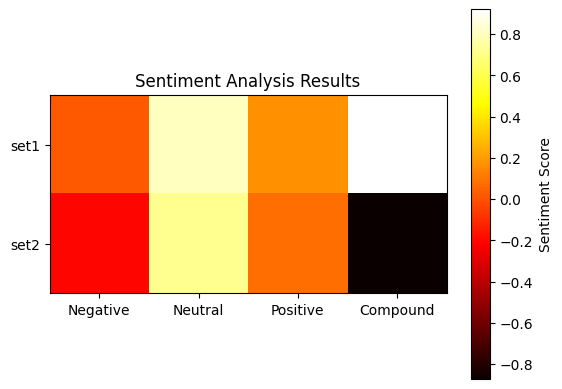

     neg    neu    pos  compound
0  0.021  0.808  0.171    0.9201
1 -0.202  0.718  0.080   -0.8720


In [ ]:
#Create Heatmap for the results
opposite_sentiment_scores = np.array([[0.021 , 0.808 , 0.171 , 0.9201],[-0.202, 0.718, 0.08, -0.872]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(opposite_sentiment_scores, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()

import pandas as pd
# Sample sentiment scores
sentiment_scores = [
    [0.021 , 0.808 , 0.171 , 0.9201],
    [-0.202, 0.718, 0.08, -0.872]
]

# Create a dataframe to store the sentiment analysis data
sentiment_df = pd.DataFrame(sentiment_scores, columns=['neg', 'neu', 'pos', 'compound'])

# Display the dataframe
print(sentiment_df)

#Sort sentences and Inject more Positive Sentences

In [ ]:
# Inject positive sentences and highlight them
positive_sentences = [
    "Construction contracts provide a clear framework for all parties involved, ensuring that everyone understands their roles and responsibilities",
    "By signing a construction contract, both the client and the contractor can have peace of mind, knowing that the project will be completed according to the agreed-upon terms and conditions",
    "Construction contracts help to establish a timeline for the project, ensuring that it progresses smoothly and efficiently",
    "With a construction contract in place, there is a legal document that outlines the payment terms, protecting both the client and the contractor from any potential disputes",
    "Construction contracts often include provisions for change orders, allowing for flexibility in case modifications or adjustments need to be made during the construction process",
    "By having a construction contract, the client can have confidence that the project will be completed within the agreed-upon budget, minimizing the risk of unexpected costs"
]

highlighted_text = ""
highlighted_sentences = []

for i, sentence in enumerate(sentences):
    if i < len(positive_sentences):
        # Inject positive sentence
        highlighted_sentence = f"**{positive_sentences[i]}**"
        highlighted_sentences.append(highlighted_sentence)
    highlighted_sentences.append(sentence)

highlighted_sentences.sort()
highlighted_text = ". ".join(highlighted_sentences)

# Display the modified text with highlighted positive sentences
display(Markdown(highlighted_text))



sentiment_scores = analyzer.polarity_scores(positive_sentences)

print("Overall Sentiment Score is Positive:",sentiment_scores)
print('-' * 50)



. . . 


































. 






Free Construction Contract: Make, Sign & Download - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Construction contracts













MAKE YOUR FREE Construction Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Construction Contract
            


Make document                    



 


Other Names:
Construction Agreement
Construction Management Agreement
Service Agreement for Construction
Construction Services Contract








What weâll cover



About Construction Contracts


Construction Contract FAQs


Construction Contract checklist






What is a Construction Contract?
A Construction Contract is an agreement that outlines the terms of a construction project. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Construction Contract checklist
Complete your free Construction Contract with our Make it Legalâ¢ checklist







Make this document
Customize your Construction Contract by answering simple questions. 




Collapse





Definitions of Construction Contract Terms






Term


Definition 






Americans with Disabilities Act


A federal civil rights statute that prohibits discrimination against individuals with disabilities in employment, education, and businesses that are open to the general public. 



Are there any additional actions that I will need to take once I make a Construction Contract?





Attached alongside each Construction Contract, there will be a series of tips on what is next to finalize the document. 



What are the different types of Construction Contracts?





The five main types of Construction Contracts are:

Lump Sum - A lump sum is agreed upon for a project, e.g. 



What details should my Construction Contract include?





In order to make a Construction Contract with Rocket Lawyer, you'll need the following details:

Contact information for the property owner
What type of services will be provided
Any plans, specifications, and construction documents
Work site information
What materials and labor will be provided
Permit and insurance details
Subcontractor information, if applicable
How much it will cost and when payment is due
How long the project will last

As you may expect, Construction Contracts made with Rocket Lawyer also include the typical legal language about the non-employer relationship, dispute resolution, and finally, liability for losses. 



Would Rocket Lawyer be able to review my Construction Work Agreement before it is signed?





Seeking out a legal professional to look over your Construction Contract may take a long time if you try to do it by yourself.  .           Contractor's Initials: _______ Property Owner's Initial: ______________                Contractor's Initials: _______ Property Owner's Initial: ______________                Contractor's Initials: _______ Property Owner's Initial: ______________       .      The Primary Contractor should file a Notice to Owner prior to starting work under this Agreement in order to preserve the Contractor's rights to file a lien against the property should the Owner fail to make payment.                  b.                  c.                  d.         .   shall obtain all necessary building permits.   will make available to  all plans, specifications, drawings, blueprints, and similar construction documents necessary for  to provide the Services described herein.  Beginning on ,  will provide to      Description:   .  agrees to pay any increase in the cost of the Construction work as a result of any written, dated and signed Change Order.  agrees to pay in installment payments of  the total sum of  as follows:   agrees to pay  as follows:       Payment discount terms include a  percent discount if the total bill is paid within  days.  also agrees to keep the Worksite clean and orderly and to remove all debris as needed during the hours of work in order to maintain work conditions which do not cause health or safety hazards.  and its employees, agents, and representatives will protect such information and treat it as strictly confidential.  shall apply for and obtain any other necessary permits and licenses required by the local municipal/county government to do the work, the cost thereof shall be included as part of the Payment to  under this Contract.  shall commence the work to be performed within 30 days of  and shall complete the work on or before , time being of the essence of this contract.  shall have the right to inspect all work performed under this Contract.  shall maintain these stakes in proper position throughout construction.  shall make warranty claims timely within the stated warranty period upon discovering a defect or performance problem.  shall not provide indemnity against claims or losses deemed to be caused by the sole negligence or willful misconduct of  or 's agents or employees.  shall pay all costs of collection, including without limitation, reasonable attorney fees.  shall permit  to use, at no cost, any electrical power and water use necessary to carry out and complete the work.  shall provide and maintain water and electrical service, connect permanent electrical service, gas service or oil service, whichever is applicable, and tanks and lines to the building constructed under this Agreement after an acceptable cover inspection has been completed, and prior to the installation of any inside wall cover.  shall provide the Services in a workmanlike manner, and in compliance with all applicable federal, state and local laws and regulations, including, but not limited to all provisions of the Fair Labor Standards Act, the Americans with Disabilities Act, and , and the New Jersey Contractors Registration Act   .  shall provide to  a List of each and every party furnishing materials and/or labor to  as part of the Services, and the dollar amounts due or expected to be due with regards to provision of the Services herein described.  shall, at 's expense, connect sewage disposal and water lines to said building prior to the start of construction, and at all times maintain sewage disposal and water lines during construction as applicable.  shall: (A) Make progress payments no later than 14 days after the date the billing is received; and (B) Make final payment of all remaining amounts no later than seven days after the date that  approves the work.  warrants that  owns the property herein described and is authorized to enter into this contract.  will allow free access to work areas for workers and vehicles and will allow areas for the storage of materials and debris.  will make reasonable efforts to protect driveways, lawns, shrubs, and other vegetation.  will promptly return all such materials to  upon completion of the Services.  will provide all services, materials and labor for the construction of  described at the property of  located at: , , ,  hereinafter referred to as ("Worksite").    .    .     .      .      .     desires to provide Construction services to  and  desires to obtain such services from .     may substitute materials only with the express written approval of , provided that the substituted materials are no lesser quality than those previously agreed upon by  and .     warrants its labor for a period of one (1) year.    , or any allowed person, e.g.    , or other labor disputes, or supplier failuresAny controversies or disputes arising out of or relating to this Agreement will be submitted to mediation in accordance with any statutory rules of mediation.    - Notice of Right to Rescind.    For further information and resources, please see California Business and Professions Code Sections 7150-7168 and the California Contractors State License Board website: http://www.cslb.ca.gov/   



 







About Construction Contracts
Learn how to make a contract for construction work







Collapse all

|






Expand all








How To Write a Construction Contract


A Construction Contract (also known as a Construction Contract Agreement) between the Contractor and the Owner is very important for successful completion of a construction project.    If the Contractor intends to hire a Subcontractor to assist on this project, the Contractor should notify the Subcontractor of the required Notice the Subcontractor must provide to the Property Owner prior to starting work on the project.    If the parties decide not to electronically sign this contract, be sure that the Notice of Right to Cancel is signed on the same day as the Contract itself is signed.    Payment Discount Terms      If any invoice is not paid when due, interest will be added to and payable on all overdue amounts at  percent per year, or the maximum percentage allowed under applicable laws, whichever is less.    REQUIRED NOTICE.    The Notice to Owner included in this  is required by Missouri Law in order for the Contractor to preserve his or her right to file a Mechanic's Lien should the Owner fail to make payment for services or materials provided.    Upon completion of the project,  agrees to sign a Notice of Completion within days after the completion of the contract.    Upon termination of this Contract,  will return to  all records, notes, documentation and other items that were used, created, or controlled by  during the term of this Contract.    While a Contractor typically has 6 months from the date the last labor or material was provided to file a Mechanics Lien, if the Owner records a Notice of Intended Sale the Contractor must provide a Notice of Rights 5 days prior to the date of closing set forth in the Notice of Intended Sale in order to maintain their right to file a lien. "Confidential information" is information that is unique to a specific business or individual and is withheld from anyone without access. $20,000 to remodel the kitchen.
Time & materials - The customer pays for the actual costs of time and materials.
Costs plus - This is similar to time and materials, except that it also includes a "plus" for profit.
Unit price - The project is broken up into smaller chunks, or units, rather than one overall price.
Guaranteed Maximum Price - As it sounds, there is a guaranteed maximum, and the contractor becomes responsible for any cost above that guaranteed maximum.
 



How do you recognize revenue in a construction contract?





As this is an accounting question, you may want to consult with an accountant for information specific to your unique situation. 's liability under a warranty claim shall be limited to and not exceed the total price charged for the work performed. **By having a construction contract, the client can have confidence that the project will be completed within the agreed-upon budget, minimizing the risk of unexpected costs**. **By signing a construction contract, both the client and the contractor can have peace of mind, knowing that the project will be completed according to the agreed-upon terms and conditions**. **Construction contracts help to establish a timeline for the project, ensuring that it progresses smoothly and efficiently**. **Construction contracts often include provisions for change orders, allowing for flexibility in case modifications or adjustments need to be made during the construction process**. **Construction contracts provide a clear framework for all parties involved, ensuring that everyone understands their roles and responsibilities**. **With a construction contract in place, there is a legal document that outlines the payment terms, protecting both the client and the contractor from any potential disputes**. , and its employees, agents, or representatives will not at any time or in any manner, either directly or indirectly, use for the personal benefit of , or divulge, disclose, or communicate in any manner, any information that is proprietary to . A Construction Contract can also provide the option of making payment installments on specific dates, such as monthly or quarterly, or after a specific event has occurred, such as completion of various stages of the project.
Another option is to pay for the services based on an hourly fee and the number of hours required to complete the services. A Construction Contract should identify each party and their responsibilities, fully define the work to be done, and fix the amount and timing of payment.
The very basic elements of a Construction Contract are:

Identification of the parties.
A description of the services to be performed with drawings and specifications if relevant and possible.
The dates or scheduled dates for performance of the services.
Any conditions or limitations placed on either of the parties or warranties related to the performance of services.
Payment terms.

Letâs take a closer look at some of the provisions you may encounter in a Construction Contract.
Term
The length of the Construction Contract is usually very clearly stated. A Construction Contract will help you engage a Contractor to do all the work and provide all the materials, tools, machinery and supervision necessary for the construction of a structure on real property. A confidentiality agreement, also known as a non-disclosure agreement (NDA) protects the secrecy of the information.




Fair Labor Standards Act


A federal statute that governs minimum wage, overtime compensation, employer recordkeeping requirements, child labor, and other matters. A construction contractor, for example, may agree to cover any claims made against the client that arise from errors, omissions, or negligent acts by the contractor during the performance of their work. A copy of this notice has been included with your Contract. A guarantee by a construction contractor that their work, once completed, will remain in good working order for a specified period of time, such as one year. A lawsuit is brought on any claim, seizure, lien or levy for labor performed or materials used on or furnished to the project by either party, or there is a general assignment for the benefit of creditors, application or sale for or by any creditor or government agency brought against either party. A notice concerning commercial liability insurance is attached to this contract. A notice concerning workers' compensation insurance is attached to this contract. A provision in the contract can confirm this expectation and obligate the Contractor to cooperate in documenting the Owner's ownership rights.
Service Contract Confidentiality
The Construction Contract can include an option that obligates the Contractor to protect and not disclose the Owner's proprietary or confidential information. A representation by a construction contractor that their work will meet certain standards, they will use materials that are of good quality, and the work will conform to the contract and designs approved by the client. A typical period to cure is thirty (30) days. AMENDMENT. Additionally, information is confidential if unauthorized disclosure could result in harm to the owner. All defects and uncompleted items shall be reported immediately. All inspection and certification will be done at 's expense. All product warranties will be extended to  upon payment in full of work performed. All proof of service should be kept in a safe location. All work that needs to be inspected or tested and certified by an engineer as a condition of any government departments or other state agency, or inspected and certified by the local health officer, shall be done at each necessary stage of construction and before further construction can continue. Another approach could be via the Rocket Lawyer attorney network. Any amendments must be in writing and signed by each party. Any controversies or disputes arising out of or relating to this Agreement will be resolved by binding arbitration under the rules of the American Arbitration Association. Any controversies or disputes arising out of or relating to this Agreement will be submitted to mediation in accordance with any statutory rules of mediation. Any notice or communication required or permitted under this Agreement shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing. Any such materials shall remain the property of . As a general matter, however, revenue recognition can be done either on a prorated basis dependent upon the percentage of completion, or once the project is substantially completed, following the completed-contract method.
If you have questions about making Construction Contracts or structuring your payment terms, ask a lawyer. As a small business owner or operator, you can be confident that Rocket Lawyer is by your side. As the Primary Contractor on a project you should consider informing any subcontractors of its responsibility. Be sure to read the interview questions carefully and please answer each question completely. Be sure to read the interview questions carefully and please answer each question completely. Before work begins under this Contract,  shall furnish certificates of insurance to  substantiating that  has placed in force valid insurance covering its full liability under the Workers' Compensation laws of the  and shall furnish and maintain general liability insurance, and builder's risk insurance for injury to or death of a person or persons, and for personal injury or death suffered in any construction related accident and property damage incurred in rendering the Services. Billings or estimates for this construction contract shall be submitted in accordance with the "PAYMENT" section of this contract. Both involve an unbiased third party (mediator or arbitrator) who helps with negotiations in an effort to come to a resolution. COMPLIANCE WITH LAWS. CONFIDENTIALITY. Certain employees, such as those working in an administrative, executive, or professional capacity, may be exempt from the statuteâs minimum wage and overtime provisions.




Federal Family and Medical Leave Act


A federal employment statute that allows certain employees to take up to 12 weeks of unpaid leave per year for certain family or medical reasons, without the risk of losing their job or benefits. Construction Contracts outline the project details, expectations, costs and payments, and can also define how to handle unexpected issues (such as weather delays or material shortages). 

Typically, a contractor will draft the agreement and send it to the property owner for review. Consult with a Rocket Lawyer network attorney for affordable legal advice regarding your particular Construction Contract. Contractors are only exempt from workers' compensation requirements if they have no employees. DEFAULT. Depending on the state, these may include:
 
Various consumer protection information brochures and notices, such as A Consumer Protection Notice, an Information Notice To Owner About Construction Liens, a Notice of Procedure, Beneficial Information to Consumers Summary of Registration Law, etc.
A Disclosure of Lien Rights form (which may also be called a Notice of Right to Lien, Notice of Possible Mechanics Lien, Notice of Lien Rights, etc.). Details regarding the contract price and what is included may be subject to state and local rules, laws, and regulations. Determining whether a breach of contract was âmaterialâ or ânon-materialâ depends on subjective factors like the nature of the work to be performed under the contract and the extent to which the contractorâs work complies with the clientâs wishes.




Warranty


1. Driveways will be kept clear for the movement of vehicles during work hours. ENTIRE AGREEMENT. Each progress payment may be specified in dollars and with reference to what will trigger the payment, including the amount of work or services to be performed as well as any materials to be supplied. Extra Work and Change Orders become part of the contract once the order is prepared in writing and signed by the parties prior to the commencement of any work covered by the new change order. FREE ACCESS TO WORKSITE. Failure to answer a question could result in California-mandated clauses, or required information, to be missing and render the Contract void. Failure to answer a question could result in the omission of state-mandated clauses or required information, which could render the Contract void.
If the parties decide not to electronically sign this contract, be sure that the Notice of Right to Cancel is signed on the same day as the Contract itself is signed. 




Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Construction Contract also made:





Independent Contractor Agreement
Hire or be hired with confidence







Home Improvement Contract
Hire contractors for your home improvement project







Remodeling Contract
Hire contractors for your remodeling project







Subcontractor Agreement
Set terms for an agreement with a subcontractor






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Construction Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. Finally, you will need to send a copy of the signed contract to the property owner. For example, a construction contractor may be excused from completing work on a house if, while the job is underway, (1) a third party commits arson and burns down the house or (2) a tornado destroys the house.




Indemnification


An agreement by one party to a contract to take on the other partyâs financial or legal liabilities. For example, a construction contractor may come into contact with a clientâs proprietary information at the clientâs worksite. For example, if the Owner has retained the Contractor to build a garage on the Owner's property, a person injured on the work site by the Contractor may sue both the Contractor (as the negligent party) and the Owner (as the owner of the property where the injury occurred). For example, if the contract includes a confidentiality provision, the Contractor may have to continue to keep the Owner's protected information confidential beyond the stated term of the contract.
Contract Price
The amount of the total cost of the contract â which includes profit, labor, and materials but excludes finance charges â may be listed, and in some cases, may be required. For various reasons, the non-assigning party may not feel comfortable dealing with a stranger to the original contract. Further personalized editing is permitted, if necessary. Further, the homeowner might be sued for any injuries sustained by uncovered workers.
Work Product Ownership
If a product is created as a result of the service, it may be important to specify which party will own the rights to the work product. GOVERNING LAW. Get started now!





Review your contract
Look over your customized Construction Contract to ensure it matches your intentions. Homeowners should be wary of Contractors who claim they are exempt but appear on site with employees. However, any such change or modification shall only be made in a written "Change Order" which is signed and dated by both parties. However, this indemnity does not extend to liability for loss or damage resulting from the negligence, intentional act, or omission of  or 's agents or employees. However, this indemnity does not extend to liability for loss or damage resulting to the extent the claims arise out of, pertain to, or relate to the active negligence or willful misconduct of  or 's agents or employees. INSPECTION. INSURANCE. If  provides work, services, or other preparatory work in connection with a public building or improvement,  may require  to indemnify and hold harmless  and its officers and employees, from liabilities, damages, losses and costs, including reasonable attorney fees and court costs, but only to the extent caused by the negligence, recklessness, or intentional wrongful conduct of the contractor, subcontractor, or design professional, including any other persons employed or used by such contractor, subcontractor or design professional in performance of the contract. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision will be deemed to be written, construed, and enforced as so limited. If a reasonable period of time has passed and the problem is not corrected, then a notice of termination, due to the default, may be given. If any provision of this Agreement will be held to be invalid or unenforceable for any reason, the remaining provisions will continue to be valid and enforceable. If mediation does not successfully resolve the dispute or is unavailable, then the parties may proceed to seek an alternative form of resolution in accordance with any other rights and remedies afforded to them by law, including filing suit. If mediation is not successful in resolving the entire dispute or is unavailable, any outstanding issues will be submitted to final and binding arbitration under the rules of the American Arbitration Association. If someone brings a legal claim against the client under these circumstances, the contractor would be obligated to cover the clientâs costs.




Material Default


A significant failure to abide by or honor the terms of a contract, which may allow the non-breaching party to suspend or terminate the contract and/or recover damages from the breaching party. If the contract for the public building or improvement is for another purpose,  cannot provide indemnity as it is prohibited by 's public policy. If the contract is for services to be provided on an ongoing basis, installment payments may be preferred.
Progress Payments
If the parties contract for progress payments, the details of these payments can be set forth under the heading Schedule of Progress Payments. If the cure period is not specified in the contract, then the time period given must be long enough to reasonably allow the defaulting party a chance to correct the problem.
Alternative Dispute Resolution
Both mediation and arbitration are forms of Alternative Dispute Resolution (ADR) and offer an alternative to going to court, which can be expensive. If the party in default fails to remedy the situation in the specified number of days, the non-breaching party may elect to terminate the contract.
Breach of Contract
If a party to a contract fails to meet its contractual obligations, perhaps by being unable to perform an act, or not delivering prescribed goods, or making a payment by a certain deadline, that party is in "breach" or "default" of the contract.
When one party defaults under a contract for the first time, that does not necessarily entitle the non-defaulting party to immediately terminate or end the contract. If the project passes its final inspection and  does not provide the Notice,  may sign the Notice of Completion on behalf of . If you sign this agreement online, a signed copy will be securely stored in your account. In addition to any and all other rights a party may have available according to law of the , if a party defaults by failing to substantially perform any provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may terminate the Contract by providing written notice to the defaulting party. In order for the Owner to avoid paying for the negligent acts of the Contractor, it is common for the Contractor to agree to indemnify the Owner for any damages or injuries caused by the Contractor. In order to qualify for leave, employees must have worked for a covered employer for at least 12 months, and they must have worked at least 1,250 hours during the 12 months immediately before the requested leave.




Force Majeure


A clause that protects either or both parties from liability for breach of contract if an unforeseeable, unavoidable event makes it impossible for them to fulfill their contractual duties. In the event the cost of a Change Order is not known at the time a Change Order is executed,  shall estimate the cost thereof and  shall pay the actual cost whether or not this cost is in excess of the estimated cost. In the process of making your agreement, you also will have the ability to designate which state's jurisdiction it falls under. It applies to private businesses with at least 15 employees, as well as state and local governments.




Confidentiality


A contractual agreement that one or both parties will not disclose private, confidential, or proprietary information that they encounter during the course of the contract. It becomes effective as of the date specified in the Contract.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Anyone named in the document should receive a copy of the signed document. It is best to send this Notice by certified mail, return receipt requested to ensure proof of receipt. It may also apply to human-caused events like criminal acts or war. It requires employers to provide reasonable accommodations to allow employees with disabilities to perform their job duties unless doing so would pose an undue burden on an employer. MATERIALS AND/OR LABOR PROVIDED. NOTICE. NOTICE OF ALTERNATIVE BILLING CYCLE. Note that if the parties agree to arbitration as a dispute resolution method, it is typically the case that the parties are waiving their right to bring the issue or dispute to court and agree to accept the arbitrator's decision as final and legally binding.
General Provisions
A Construction Contract, or any other Contract for Services, may include provisions that:

Make it clear that the document contains the entire contract of the parties;
Require any changes to the contract to be in writing and signed by the party affected by the change;
Preserve the remainder of the contract if one of its provisions is unenforceable; and
Specify which state's laws will govern any disputes between the parties.

Indemnity
Because the Owner will generally be the owner of what will be produced on the property, it is possible that the Owner could be liable to a third party who is injured by the Contractor. Once both parties agree on the terms, they both sign to make the contract legally binding.
When can you use a Construction Contract?

You are a contractor in charge of building or renovating a property.
You are hiring a contractor to build or renovate your property.






Sample Construction Contract
The terms in your document will update based on the information you provide





This document has been customized over 49.6K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


         This  (the "Contract" or "Agreement") is made as of  (the "Effective Date") by and between  of , ,  , and  of , ,  . Once served a copy of the Notice and Proof of Service must be kept for filing with the Mechanics Lien should one become necessary due to the Owners failure to pay for services or labor. Once served a copy of the Notice and Proof of Service must be kept for filing with the Mechanics Lien should one become necessary due to the Owners failure to pay for services or labor.
Some states require the Contractor attach the additional notices to the Construction Contract. Options for the term include:

Upon the completion of the services.
Upon a specific event or occurrence.
On a specific date.
Upon written notice by either party.
On some other basis.

Certain provisions of the contract may, however, survive the termination of the Contract. PERMITS. PLANS, SPECIFICATIONS AND CONSTRUCTION DOCUMENTS. PROGRESS PAYMENTS. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Plus, you can always save and continue later once youâve started your document creation process. Prior to meeting with the Property Owner to sign this , the following forms should be located and printed:   - Consumer Protection Notice: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/CPN.pdf   -Information Notice To Owner About Construction Liens: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/information%20notice%20liens.pdf   -Notice of Procedure: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/notice%20of%20procedure.pdf     This  includes the following additional attachments which should be used as follows:   - Notice of Possible Mechanics Lien. Prior to the start of construction,  shall provide an easily accessible building site, which meets all zoning requirements for the structure, and in which the boundaries of 's property will be clearly identified by stakes at all corners of the property. Progress payments shall be made on the basis of a certified billing or estimate for work performed, and for materials or products supplied, during the preceding monthly billing cycle or during an alternative billing cycle identified in this construction contract to , ,  . REMEDIES. Rather, it is recommended, and often required by the contract, that a notice of default and an opportunity to cure (or fix the failure) be given. Remedies for breach of warranty include the financial cost incurred by the client because of the breach.
2. Rocket Lawyer Premium members are able to ask for a contract review from an attorney with experience in business or send additional questions. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. SCOPE OF WORK. SEVERABILITY. SIGNATORIES. Some examples of "Confidential information" might include customer lists, trade secrets, products, business plans, financial statements, and manufacturing processes.
You can choose to include an option in the Contract that requires the Contractor to return the Owner's records and other property upon the completion of the service.
Assignment
An "assignment" of a contract occurs when one party to a contract transfers its contract rights and obligations under the contract to a new third party. Some states also require this notice to be signed by the property owner.
A Notice of Right to Rescind.


If you are subcontracting as on a project, you should consider informing any subcontractors of their responsibility to provide any required notices prior to starting work. Such Change Orders shall become part of this Agreement. The Acknowledgement of Receipt near the bottom of the form should be signed by each Owner. The Contractor is required to provide the Owner with the included Notice of Possible Mechanics Lien within 10 days of starting work on the construction project described in this Contract. The Contractor must provide the Property Owner with 3 separate notices prior to or at the time of signing the . The Owner generally has an expectation to be the owner of any work product resulting from the services. The Owner often agrees to pay for the services in a lump sum upon completion of the services. The Owner(s) should only execute the cancelation portion of the form if the Owner wishes to cancel the  within the allowed amount of time. The arbitrator's award will be final, and judgment may be entered upon it by any court having proper jurisdiction. The arbitrator's award will be final, and judgment may be entered upon it by any court having proper jurisdiction. The best way for homeowners to manage a project is to keep tight control of disbursements to the Contractor and never pay for work not actually completed.
Commercial General Liability Insurance
Homeowners may want to make sure the Contractor has adequate liability coverage on all projects and request to be added as an additional insured under the Contractor's policy.
Workers' Compensation Insurance
The Construction Contract may require that contractors disclose whether they have workers' compensation insurance or whether they are exempt. The contractor may be obligated to repair or replace defective parts or materials during this time period.



 




Collapse












Construction Contract FAQs








Collapse all

|






Expand all







Why should a construction contractor write a Construction Contract?





Whether you are being contracted by an acquaintance or a stranger, the Construction Contract is a document that should never be skipped. The documents requirements can be located at: http://www.azleg.gov/FormatDocument.asp?inDoc=/ars/33/00992-01.htm&Title=33&DocType=ARS. The failure of  to make a required payment when due. The failure of  to make the building site available or the failure of  to deliver the Services in the time and manner provided for in this Agreement. The failure of either party to enforce any provision of this Contract shall not be construed as a waiver or limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract. The form can be printed for the Hawaii Government Website at: http://hawaii.gov/dcca/pvl/boards/contractor/application_publications/pvl_ct-25.pdf/?searchterm=Disclosure%20of%20LIen%20Rights    All Subcontractors are required to provide the Property Owner with a Notice of Right to Lien in order to preserve its right to file a lien. The insolvency of either party or if either party shall, either voluntarily or involuntarily, become a debtor of or seek protection under Title 11 of the United States Bankruptcy Code. The main difference between the two is that an arbitrator makes a final and binding decision (just as if a judge had decided on the case), while a mediator structures negotiations so that the parties can come to a compromise and settle the matter with each other. The non-breaching party may provide the party in default with written notice of the breach and state the number of days that the breaching party will have to cure or fix the default. The occurrence of any of the following shall constitute a material default under this Contract:              a. The order must describe the scope of the extra work or change, the cost to be added or subtracted from the contract, and the effect the order will have on the schedule of progress payments.This Contractor does not carry commercial general liability insurance. The party receiving said notice shall have  days from the effective date of said notice to cure the default(s) or begin substantial completion if completion cannot be made in  days. The requirements for a Construction Home Improvement Contract are very strict in California. The statute applies to private businesses with 50 or more employees, government agencies, and schools. The warranty rights and remedies set forth in the Maine Uniform Commercial Code apply to this contract. Therefore, it is common for the parties to prohibit assignments without the prior written consent of the non-assigning party. These benefits may help you make the decision to use one:

Neither party is surprised by how long the work takes
There is no confusion about fees charged
The construction contractor and property owner both understand their responsibilities

A few unfavorable outcomes from not signing one could include incomplete payments, impractical expectations, unclear due dates, and more issues. These workers may be considered to be the homeowners' employees, and the homeowners' insurers may be forced to cover the workers for any injuries sustained on the project. This Agreement may be modified or amended in writing, if the writing is signed by each party. This Agreement shall be construed in accordance with, and governed by the laws of the , without regard to any choice of law provisions of  or any other jurisdiction. This Agreement shall be signed ,  and ,  and shall be effective as of the date first written above. This Agreement supersedes any prior written or oral agreements between the parties. This Contract contains the entire Agreement of the parties, and there are no other promises or conditions in any other contract or agreement whether oral or written concerning the subject matter of this Agreement. This Contractor carries commercial general liability insurance written by . This Contractor carries workers' compensation insurance for all employees. This Contractor has no employees and is exempt from workers' compensation requirements. This Contractor is a limited liability company that carries liability insurance or maintains other security as required by law. This Contractor is self-insured. This List of materials and/or labor shall be attached to this Agreement as Exhibit  declares, under the laws of the , that this List is a true and correct statement of each and every party providing materials and/or labor as part of the Services herein described. This Notice along with a Subcontractor's Agreement are available on RocketLawyer.com. This Notice must be provided in duplicate to EACH Property Owner. This construction contract will allow  to require the submission of billings or estimates in billing cycles other than monthly cycles. This document provides helpful information to the Property Owner regarding their rights under Rhode Island General Law. This document should be provided to the Property Owner. This indemnity shall be provided even if  is partly responsible for the claim, damage, injury or loss, but  shall not provide indemnity against claims or losses deemed to be caused by the negligence, willful misconduct, or breach of contract of  or 's agents or employees. This indemnity shall be provided in proportionate extent to 's partial responsibility for the claim, damage, injury or loss, but  shall not provide indemnity against claims or losses deemed to be caused by the sole negligence or willful misconduct of  or 's agents or employees. This indemnity shall be provided only to the proportionate extent of 's partial responsibility for the claim, damage, injury or loss. This is known as indemnifying the client. This is sometimes called an âAct of Godâ clause because it applies to natural disasters like earthquakes or hurricanes. This must be provided to the Property Owner before the General Contractor starts work on the project. This notice shall describe with sufficient detail the nature of the default. This option allows the non-assigning party the opportunity to evaluate the proposed new party and the risks involved in allowing the assignment.
Defaults
A Construction Contract may provide that in addition to any other rights provided by law, a party may terminate (end) the contract if the other party has failed to fully perform the obligations under the contract. This provides a minimum level of performance that the Contractor must meet to fulfill the terms of the contract. This provision might not be included in the contract if the Contractor is not providing a specific warranty.
The particular requirements for Construction Contracts can vary depending on the rules, regulations, and laws particular to the state and local authorities that apply to the contract (or any home builder contract) and construction project itself. This provision will continue to be effective after the termination of this Contract. This version is dated 2007 and is current as of December 2013. Thus, except for the down payment, Contractors may neither request nor accept payment that exceeds the value of the work performed or the materials delivered. Thus, in the above example, such a provision would provide that if the injured party recovered a judgment against the Owner in a lawsuit, the Contractor would have to repay the Owner for any amount of the judgment paid by the Owner, plus the Owner's other related costs such as attorney fees.
Warranties
A Construction Contract might include a warranty that the services provided under the contract will meet the local standard of similar Contractors in the community. Title 5 Chapter 65). To verify the version is still current please visit the Attorney Generals website at: http://www.maine.gov/ag/consumer/housing/home_construction.shtml. UTILITIES. Unless waived by a party providing notice, the failure to cure or begin curing, the default(s) within such time period shall result in the automatic termination of this Contract. Upon request,  will execute all documents necessary to confirm or perfect the exclusive ownership of  to the Work Product. Upon request,  will execute all documents necessary to confirm or perfect the exclusive ownership of  to the Work Product.. WAIVER OF CONTRACTUAL RIGHT. WORK SITE. Weâll help you along the way and build a document that fits your needs. What constitutes a "reasonable" period of time within which to cure the default varies according to the circumstances and often the contract itself. When in doubt, consult with a Rocket Lawyer network attorney to review your contract and to ensure it is in compliance with the law.
Payment to Contractor
Payment terms vary depending on the services provided and the parties involved. When required, this Construction Contract includes the additional attachments which should be used. While state law may supersede certain matters covered by the FLSA, it generally applies to private-sector employers, the federal government, and state and local governments. You are encouraged to engage with your contract in any of the following ways: editing, printing, getting signatures via RocketSignÂ® when ready, and/or saving it as a Word or PDF document. You can scan and upload attachments to your Rocket Lawyer account using your Rocket Lawyer account to ensure you have a complete record of all documents involved in this transaction.
In some states, in order to preserve the right to file a Mechanics Lien on the property, the Contractor or Laborer must serve the Property Owner with a Preliminary Twenty Day Notice within a certain timeframe (for example, 5 days or 20 days) of first providing services, labor or materials. You can share your document from your account.




Important Details

The Primary Contractor should file a Notice to the Owner prior to starting work under this Agreement in order to preserve the Contractor's rights to file a lien against the property should the Owner fail to make payment.
Make sure any optional attachments have been included. You can use Rocket Lawyer's Affidavit of Service to include with this Notice and further document proof this Notice was mailed. You can use Rocket Lawyer's Subcontractor Contractor to enter into contract with the Subcontractor and provide the Subcontractor with the Notice of Right to Lien which can be served on the Property Owner. You can use the Subcontractor Contract to enter into a contract with the Subcontractor and provide the Subcontractor with the Notice of Right to Lien which can be served to the Property Owner.
Prior to starting work under this Contract, a contractor should make certain all steps have been taken to protect their right to file a Mechanic's Lien should one become necessary.
The requirements for a Construction Home Improvement Contract are very strict in some states. You may also want to review the document with any other parties to avoid delays at signing.

Remember that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

All Providers (or Representatives of the Providing Company) -- typically the Primary Contractor
All Recipients (or Representatives of the Receiving Company) -- typically the Homeowner(s)


The Contract can be signed online. You may call (the insurance company or trust company or bank) at  to check on the contractor's insurance coverage or security. You may call the insurance company at  to check the contractor's insurance coverage. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. lender, public body, or inspector, may make changes to the scope of the work from time to time during the term of this Agreement. on or before . upon executing this Agreement.   .   .   .   .    .     .     .     .     .     .    is only responsible for furnishing any building improvements related to construction of the structure, but not related to landscaping, grading, walkways, painting, sewer or water systems, steps, driveways, patios and aprons, etc., unless they are specifically agreed to in writing.    may make progress payments or final payment later than 14 days after the date the billing or estimate is submitted if:   (A)  provides drawings and specifications that expressly state in a clear and conspicuous manner that an extended payment specified period is allowed and identify the extended payment period as a specific number of days after the date that the billing or estimate is received or the date that the owner approves all work; and (B)  provides on each page of drawings and specifications the Notice of Extended Payment Provision statement included with this construction contract.   - Beneficial Information to Consumers Summary of Registration Law (R.I.G.L.   In addition to any additional warranties agreed to by the parties, the contractor warrants that the work will be free from faulty materials; constructed according to the standards of the building code applicable for this location; constructed in a skillful manner and fit for habitation or appropriate use.   In addition to the Notice contained inside the , the Contractor must provide the Owner with a Disclosure of Lien Rights form which must be signed prior to the Contractor starting work on the project.   In order to preserve the right to file a Mechanics Lien on the property, the Contractor or Laborer must serve the Property Owner with a Preliminary Twenty Day Notice within 20 days of first providing services, labor or materials.   Maine law requires the Contractor attach the Maine Attorney General Home Construction Warning notice to the .   THEREFORE, in consideration of the mutual promises set forth below, the parties agree as follows:    ______________________________ (Contractor/Business Name)    ________________________ (Phone Number)    ____________________________________ (Address)  ,   __________________, ___________________ _____________         (City)  (State) (Postal Code)       ____________________________ (License Number)     ,      Salesperson Responsible for Soliciting or Negotiating this Contract:    Sales Person Name:   Registration Number:      .   The included Notice of Lien Rights must be provided to the Property Owner before the General Contractor starts work on the project.   The included Notice of Right to Lien should be served on the Property Owner prior to starting work on the project.   This includes building and construction materials, necessary labor and site security, and all required tools and machinery needed for completion of construction.  , ,  , , ,  ., in the amount of  upon completion of the services described in this Agreement.  , including the New Jersey Lien Law, or may stop work until payment is received  .  A list of job specifications is attached to this Contract.  State of Commonwealth of However, this indemnity does not extend to liability for loss or damage resulting from the sole negligence of  or 's agents or employees because it would violate 's public policy.  Three-Day  Seven-Day        Owner:            By:   Date:           Contractor: Contractor's License:             By:   Date:           the services described in the attached     ,   ,   ______________________________  (Name)   ____________________________________ (Address)         __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)        ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)        ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)    A.B

Overall Sentiment Score is Positive: {'neg': 0.014, 'neu': 0.836, 'pos': 0.151, 'compound': 0.9571}
--------------------------------------------------


#Sort sentences and Inject more Negative sentences

In [ ]:
negative_sentences = [
    "The construction contract lacked clear specifications, leading to confusion and disputes between the parties involved",
    "The construction contract failed to include penalty clauses for delays, resulting in significant project delays without any consequences for the contractor",
    "The construction contract did not adequately address change orders, causing disagreements and additional costs that were not accounted for",
    "The construction contract did not provide sufficient protection for the client in case of contractor default, leaving them vulnerable to financial losses",
    "The construction contract had ambiguous payment terms, leading to payment disputes and strained relationships between the contractor and subcontractors",
    "The construction contract did not outline a clear dispute resolution process, resulting in prolonged legal battles and increased costs for all parties involved"
]

highlighted_text_negative = ""
for i, sentence in enumerate(sentences):
    if i < len(negative_sentences):
        # Inject negative sentence
        highlighted_sentence_negative = f"**{negative_sentences[i]}**"
        highlighted_text_negative += highlighted_sentence_negative + ". "
    highlighted_text_negative += sentence + ". "

highlighted_text_negative = highlighted_text_negative.split('. ')
highlighted_text_negative.sort()
highlighted_text_negative = '. '.join(highlighted_text_negative)
# Display the modified text with highlighted negative sentences
display(Markdown(highlighted_text_negative))

negative_sentiment_scores = analyzer.polarity_scores(negative_sentences)
negative_sentiment_scores['neg'] *= -1
negative_sentiment_scores['compound'] *= 1

# Determine if overall sentiment is negative
overall_sentiment_scores = analyzer.polarity_scores(text)
if overall_sentiment_scores['neg'] < overall_sentiment_scores['pos']:
    print("Overall Sentiment Score is Negative:", negative_sentiment_scores)
print('-' * 50)


. . . . 


































. 






Free Construction Contract: Make, Sign & Download - Rocket Lawyer
































































Account

Explore



                            Make documents
                        

                            Sign documents
                        

                            Taxes
                                
 


                            Start a business
                        

                            Ask a lawyer
                        

                            Group Legal Benefits
                        

                            Pricing
                        



Get our app    




Account
Sign up
Sign in








Help
See our FAQs
Send an email
Chat online
Call (877) 881-0947












Help


See our FAQs
Send an email
Call us: (877) 881-0947








Dashboard
Member settings
Sign out









Logo







 
Make documents




Easily make legal documents

Find your document




                                                                Popular legal documents
                                                            

Business and contracts
Real estate
Family and personal



Non-Disclosure Agreement
LLC Operating Agreement
Independent Contractor Agreement
Business Contract
See more documents


Lease Agreement
Eviction Notice
Intent to Purchase Real Estate
Quitclaim Deed
See more documents


Last Will and Testament
Living Will
Divorce Settlement Agreement
Child Care Authorization
See more documents






 
Sign documents




eSign for FREE with RocketSign®

Start signing





 
Taxes

 




Let us do your taxes

File ConfidentlyTM with a pro





 
Start a business




Let us help you Start Up ConfidentlyTM

Get started




                                                                Popular business topics
                                                            

Business registrations
Business services
Business property



Start an LLC
Start a Corporation
Start a Non-profit


Registered Agent services
Statement of information
File a DBA


Trademark registration
Copyright protection
Make an NDA






 
Ask a lawyer




Get fast legal advice from an attorney

Ask your question




                                                                Popular legal topics
                                                            

Business and contracts
Finance and real estate
Family and personal



Starting a business
Contracts and business transactions
Intellectual property


Landlords
Home ownership
Taxes


Estate planning
Marriage
Divorce






 
Group Legal Benefits




Get legal benefits for your team

Request a demo





 
Pricing




Get HALF OFF with Rocket Legal+ membership

Start your free trial










 


Sign in
Sign up


Menu





 
Help                    





 
Help                    



See our FAQs
Send an email
Chat online
Call (877) 881-0947






 

























Legal documents



⌃


Business and contracts



⌃


Service contracts






⌃


Construction contracts













MAKE YOUR FREE Construction Contract


The terms in your document will update based on the information you provide.


                        Make document
                    







MAKE YOUR FREE
                Construction Contract
            


Make document                    



 


Other Names:
Construction Agreement
Construction Management Agreement
Service Agreement for Construction
Construction Services Contract








What weâll cover



About Construction Contracts


Construction Contract FAQs


Construction Contract checklist






What is a Construction Contract?
A Construction Contract is an agreement that outlines the terms of a construction project. 




Back to top



Back to top












Our quality guarantee
We guarantee our service is safe and secure, and that properly executed Rocket Lawyer legal documents are legally enforceable under applicable US laws.
Need help? No problem!
Ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.



Construction Contract checklist
Complete your free Construction Contract with our Make it Legalâ¢ checklist







Make this document
Customize your Construction Contract by answering simple questions. 




Collapse





Definitions of Construction Contract Terms






Term


Definition 






Americans with Disabilities Act


A federal civil rights statute that prohibits discrimination against individuals with disabilities in employment, education, and businesses that are open to the general public. 



Are there any additional actions that I will need to take once I make a Construction Contract?





Attached alongside each Construction Contract, there will be a series of tips on what is next to finalize the document. 



What are the different types of Construction Contracts?





The five main types of Construction Contracts are:

Lump Sum - A lump sum is agreed upon for a project, e.g. 



What details should my Construction Contract include?





In order to make a Construction Contract with Rocket Lawyer, you'll need the following details:

Contact information for the property owner
What type of services will be provided
Any plans, specifications, and construction documents
Work site information
What materials and labor will be provided
Permit and insurance details
Subcontractor information, if applicable
How much it will cost and when payment is due
How long the project will last

As you may expect, Construction Contracts made with Rocket Lawyer also include the typical legal language about the non-employer relationship, dispute resolution, and finally, liability for losses. 



Would Rocket Lawyer be able to review my Construction Work Agreement before it is signed?





Seeking out a legal professional to look over your Construction Contract may take a long time if you try to do it by yourself.  .           Contractor's Initials: _______ Property Owner's Initial: ______________                Contractor's Initials: _______ Property Owner's Initial: ______________                Contractor's Initials: _______ Property Owner's Initial: ______________       .      The Primary Contractor should file a Notice to Owner prior to starting work under this Agreement in order to preserve the Contractor's rights to file a lien against the property should the Owner fail to make payment.                  b.                  c.                  d.         .   shall obtain all necessary building permits.   will make available to  all plans, specifications, drawings, blueprints, and similar construction documents necessary for  to provide the Services described herein.  Beginning on ,  will provide to      Description:   .  agrees to pay any increase in the cost of the Construction work as a result of any written, dated and signed Change Order.  agrees to pay in installment payments of  the total sum of  as follows:   agrees to pay  as follows:       Payment discount terms include a  percent discount if the total bill is paid within  days.  also agrees to keep the Worksite clean and orderly and to remove all debris as needed during the hours of work in order to maintain work conditions which do not cause health or safety hazards.  and its employees, agents, and representatives will protect such information and treat it as strictly confidential.  shall apply for and obtain any other necessary permits and licenses required by the local municipal/county government to do the work, the cost thereof shall be included as part of the Payment to  under this Contract.  shall commence the work to be performed within 30 days of  and shall complete the work on or before , time being of the essence of this contract.  shall have the right to inspect all work performed under this Contract.  shall maintain these stakes in proper position throughout construction.  shall make warranty claims timely within the stated warranty period upon discovering a defect or performance problem.  shall not provide indemnity against claims or losses deemed to be caused by the sole negligence or willful misconduct of  or 's agents or employees.  shall pay all costs of collection, including without limitation, reasonable attorney fees.  shall permit  to use, at no cost, any electrical power and water use necessary to carry out and complete the work.  shall provide and maintain water and electrical service, connect permanent electrical service, gas service or oil service, whichever is applicable, and tanks and lines to the building constructed under this Agreement after an acceptable cover inspection has been completed, and prior to the installation of any inside wall cover.  shall provide the Services in a workmanlike manner, and in compliance with all applicable federal, state and local laws and regulations, including, but not limited to all provisions of the Fair Labor Standards Act, the Americans with Disabilities Act, and , and the New Jersey Contractors Registration Act   .  shall provide to  a List of each and every party furnishing materials and/or labor to  as part of the Services, and the dollar amounts due or expected to be due with regards to provision of the Services herein described.  shall, at 's expense, connect sewage disposal and water lines to said building prior to the start of construction, and at all times maintain sewage disposal and water lines during construction as applicable.  shall: (A) Make progress payments no later than 14 days after the date the billing is received; and (B) Make final payment of all remaining amounts no later than seven days after the date that  approves the work.  warrants that  owns the property herein described and is authorized to enter into this contract.  will allow free access to work areas for workers and vehicles and will allow areas for the storage of materials and debris.  will make reasonable efforts to protect driveways, lawns, shrubs, and other vegetation.  will promptly return all such materials to  upon completion of the Services.  will provide all services, materials and labor for the construction of  described at the property of  located at: , , ,  hereinafter referred to as ("Worksite").    .    .     .      .      .     desires to provide Construction services to  and  desires to obtain such services from .     may substitute materials only with the express written approval of , provided that the substituted materials are no lesser quality than those previously agreed upon by  and .     warrants its labor for a period of one (1) year.    , or any allowed person, e.g.    , or other labor disputes, or supplier failuresAny controversies or disputes arising out of or relating to this Agreement will be submitted to mediation in accordance with any statutory rules of mediation.    - Notice of Right to Rescind.    For further information and resources, please see California Business and Professions Code Sections 7150-7168 and the California Contractors State License Board website: http://www.cslb.ca.gov/   



 







About Construction Contracts
Learn how to make a contract for construction work







Collapse all

|






Expand all








How To Write a Construction Contract


A Construction Contract (also known as a Construction Contract Agreement) between the Contractor and the Owner is very important for successful completion of a construction project.    If the Contractor intends to hire a Subcontractor to assist on this project, the Contractor should notify the Subcontractor of the required Notice the Subcontractor must provide to the Property Owner prior to starting work on the project.    If the parties decide not to electronically sign this contract, be sure that the Notice of Right to Cancel is signed on the same day as the Contract itself is signed.    Payment Discount Terms      If any invoice is not paid when due, interest will be added to and payable on all overdue amounts at  percent per year, or the maximum percentage allowed under applicable laws, whichever is less.    REQUIRED NOTICE.    The Notice to Owner included in this  is required by Missouri Law in order for the Contractor to preserve his or her right to file a Mechanic's Lien should the Owner fail to make payment for services or materials provided.    Upon completion of the project,  agrees to sign a Notice of Completion within days after the completion of the contract.    Upon termination of this Contract,  will return to  all records, notes, documentation and other items that were used, created, or controlled by  during the term of this Contract.    While a Contractor typically has 6 months from the date the last labor or material was provided to file a Mechanics Lien, if the Owner records a Notice of Intended Sale the Contractor must provide a Notice of Rights 5 days prior to the date of closing set forth in the Notice of Intended Sale in order to maintain their right to file a lien. "Confidential information" is information that is unique to a specific business or individual and is withheld from anyone without access. $20,000 to remodel the kitchen.
Time & materials - The customer pays for the actual costs of time and materials.
Costs plus - This is similar to time and materials, except that it also includes a "plus" for profit.
Unit price - The project is broken up into smaller chunks, or units, rather than one overall price.
Guaranteed Maximum Price - As it sounds, there is a guaranteed maximum, and the contractor becomes responsible for any cost above that guaranteed maximum.
 



How do you recognize revenue in a construction contract?





As this is an accounting question, you may want to consult with an accountant for information specific to your unique situation. 's liability under a warranty claim shall be limited to and not exceed the total price charged for the work performed. **The construction contract did not adequately address change orders, causing disagreements and additional costs that were not accounted for**. **The construction contract did not outline a clear dispute resolution process, resulting in prolonged legal battles and increased costs for all parties involved**. **The construction contract did not provide sufficient protection for the client in case of contractor default, leaving them vulnerable to financial losses**. **The construction contract failed to include penalty clauses for delays, resulting in significant project delays without any consequences for the contractor**. **The construction contract had ambiguous payment terms, leading to payment disputes and strained relationships between the contractor and subcontractors**. **The construction contract lacked clear specifications, leading to confusion and disputes between the parties involved**. , and its employees, agents, or representatives will not at any time or in any manner, either directly or indirectly, use for the personal benefit of , or divulge, disclose, or communicate in any manner, any information that is proprietary to . A Construction Contract can also provide the option of making payment installments on specific dates, such as monthly or quarterly, or after a specific event has occurred, such as completion of various stages of the project.
Another option is to pay for the services based on an hourly fee and the number of hours required to complete the services. A Construction Contract should identify each party and their responsibilities, fully define the work to be done, and fix the amount and timing of payment.
The very basic elements of a Construction Contract are:

Identification of the parties.
A description of the services to be performed with drawings and specifications if relevant and possible.
The dates or scheduled dates for performance of the services.
Any conditions or limitations placed on either of the parties or warranties related to the performance of services.
Payment terms.

Letâs take a closer look at some of the provisions you may encounter in a Construction Contract.
Term
The length of the Construction Contract is usually very clearly stated. A Construction Contract will help you engage a Contractor to do all the work and provide all the materials, tools, machinery and supervision necessary for the construction of a structure on real property. A confidentiality agreement, also known as a non-disclosure agreement (NDA) protects the secrecy of the information.




Fair Labor Standards Act


A federal statute that governs minimum wage, overtime compensation, employer recordkeeping requirements, child labor, and other matters. A construction contractor, for example, may agree to cover any claims made against the client that arise from errors, omissions, or negligent acts by the contractor during the performance of their work. A copy of this notice has been included with your Contract. A guarantee by a construction contractor that their work, once completed, will remain in good working order for a specified period of time, such as one year. A lawsuit is brought on any claim, seizure, lien or levy for labor performed or materials used on or furnished to the project by either party, or there is a general assignment for the benefit of creditors, application or sale for or by any creditor or government agency brought against either party. A notice concerning commercial liability insurance is attached to this contract. A notice concerning workers' compensation insurance is attached to this contract. A provision in the contract can confirm this expectation and obligate the Contractor to cooperate in documenting the Owner's ownership rights.
Service Contract Confidentiality
The Construction Contract can include an option that obligates the Contractor to protect and not disclose the Owner's proprietary or confidential information. A representation by a construction contractor that their work will meet certain standards, they will use materials that are of good quality, and the work will conform to the contract and designs approved by the client. A typical period to cure is thirty (30) days. AMENDMENT. Additionally, information is confidential if unauthorized disclosure could result in harm to the owner. All defects and uncompleted items shall be reported immediately. All inspection and certification will be done at 's expense. All product warranties will be extended to  upon payment in full of work performed. All proof of service should be kept in a safe location. All work that needs to be inspected or tested and certified by an engineer as a condition of any government departments or other state agency, or inspected and certified by the local health officer, shall be done at each necessary stage of construction and before further construction can continue. Another approach could be via the Rocket Lawyer attorney network. Any amendments must be in writing and signed by each party. Any controversies or disputes arising out of or relating to this Agreement will be resolved by binding arbitration under the rules of the American Arbitration Association. Any controversies or disputes arising out of or relating to this Agreement will be submitted to mediation in accordance with any statutory rules of mediation. Any notice or communication required or permitted under this Agreement shall be sufficiently given if delivered in person or by certified mail, return receipt requested, to the address set forth in the opening paragraph or to such other address as one party may have furnished to the other in writing. Any such materials shall remain the property of . As a general matter, however, revenue recognition can be done either on a prorated basis dependent upon the percentage of completion, or once the project is substantially completed, following the completed-contract method.
If you have questions about making Construction Contracts or structuring your payment terms, ask a lawyer. As a small business owner or operator, you can be confident that Rocket Lawyer is by your side. As the Primary Contractor on a project you should consider informing any subcontractors of its responsibility. Be sure to read the interview questions carefully and please answer each question completely. Be sure to read the interview questions carefully and please answer each question completely. Before work begins under this Contract,  shall furnish certificates of insurance to  substantiating that  has placed in force valid insurance covering its full liability under the Workers' Compensation laws of the  and shall furnish and maintain general liability insurance, and builder's risk insurance for injury to or death of a person or persons, and for personal injury or death suffered in any construction related accident and property damage incurred in rendering the Services. Billings or estimates for this construction contract shall be submitted in accordance with the "PAYMENT" section of this contract. Both involve an unbiased third party (mediator or arbitrator) who helps with negotiations in an effort to come to a resolution. COMPLIANCE WITH LAWS. CONFIDENTIALITY. Certain employees, such as those working in an administrative, executive, or professional capacity, may be exempt from the statuteâs minimum wage and overtime provisions.




Federal Family and Medical Leave Act


A federal employment statute that allows certain employees to take up to 12 weeks of unpaid leave per year for certain family or medical reasons, without the risk of losing their job or benefits. Construction Contracts outline the project details, expectations, costs and payments, and can also define how to handle unexpected issues (such as weather delays or material shortages). 

Typically, a contractor will draft the agreement and send it to the property owner for review. Consult with a Rocket Lawyer network attorney for affordable legal advice regarding your particular Construction Contract. Contractors are only exempt from workers' compensation requirements if they have no employees. DEFAULT. Depending on the state, these may include:
 
Various consumer protection information brochures and notices, such as A Consumer Protection Notice, an Information Notice To Owner About Construction Liens, a Notice of Procedure, Beneficial Information to Consumers Summary of Registration Law, etc.
A Disclosure of Lien Rights form (which may also be called a Notice of Right to Lien, Notice of Possible Mechanics Lien, Notice of Lien Rights, etc.). Details regarding the contract price and what is included may be subject to state and local rules, laws, and regulations. Determining whether a breach of contract was âmaterialâ or ânon-materialâ depends on subjective factors like the nature of the work to be performed under the contract and the extent to which the contractorâs work complies with the clientâs wishes.




Warranty


1. Driveways will be kept clear for the movement of vehicles during work hours. ENTIRE AGREEMENT. Each progress payment may be specified in dollars and with reference to what will trigger the payment, including the amount of work or services to be performed as well as any materials to be supplied. Extra Work and Change Orders become part of the contract once the order is prepared in writing and signed by the parties prior to the commencement of any work covered by the new change order. FREE ACCESS TO WORKSITE. Failure to answer a question could result in California-mandated clauses, or required information, to be missing and render the Contract void. Failure to answer a question could result in the omission of state-mandated clauses or required information, which could render the Contract void.
If the parties decide not to electronically sign this contract, be sure that the Notice of Right to Cancel is signed on the same day as the Contract itself is signed. 




Show more





Back to top





Preview






Create Your Document In Just 3 Easy Steps:            




Build your document
Answer a few simple questions to make your document in minutes






Save, print & share
Save progress and finish on any device, download & print anytime






Sign & make it legal
Securely sign online and invite others to sign







Related documents
Rocket Lawyer members who started a free Construction Contract also made:





Independent Contractor Agreement
Hire or be hired with confidence







Home Improvement Contract
Hire contractors for your home improvement project







Remodeling Contract
Hire contractors for your remodeling project







Subcontractor Agreement
Set terms for an agreement with a subcontractor






                    Explore other Business and contracts documents
                






Ask a lawyer
Our network attorneys are here for you.




Input your question here

0/600



You've exceeded the character limit.












Rocket Lawyer Network Attorneys








Looking for something else?



Search query input field







Back to top





Start your Construction Contract now and get Rocket Lawyer FREE for 7 days
Get legal services you can trust at prices you can afford. Finally, you will need to send a copy of the signed contract to the property owner. For example, a construction contractor may be excused from completing work on a house if, while the job is underway, (1) a third party commits arson and burns down the house or (2) a tornado destroys the house.




Indemnification


An agreement by one party to a contract to take on the other partyâs financial or legal liabilities. For example, a construction contractor may come into contact with a clientâs proprietary information at the clientâs worksite. For example, if the Owner has retained the Contractor to build a garage on the Owner's property, a person injured on the work site by the Contractor may sue both the Contractor (as the negligent party) and the Owner (as the owner of the property where the injury occurred). For example, if the contract includes a confidentiality provision, the Contractor may have to continue to keep the Owner's protected information confidential beyond the stated term of the contract.
Contract Price
The amount of the total cost of the contract â which includes profit, labor, and materials but excludes finance charges â may be listed, and in some cases, may be required. For various reasons, the non-assigning party may not feel comfortable dealing with a stranger to the original contract. Further personalized editing is permitted, if necessary. Further, the homeowner might be sued for any injuries sustained by uncovered workers.
Work Product Ownership
If a product is created as a result of the service, it may be important to specify which party will own the rights to the work product. GOVERNING LAW. Get started now!





Review your contract
Look over your customized Construction Contract to ensure it matches your intentions. Homeowners should be wary of Contractors who claim they are exempt but appear on site with employees. However, any such change or modification shall only be made in a written "Change Order" which is signed and dated by both parties. However, this indemnity does not extend to liability for loss or damage resulting from the negligence, intentional act, or omission of  or 's agents or employees. However, this indemnity does not extend to liability for loss or damage resulting to the extent the claims arise out of, pertain to, or relate to the active negligence or willful misconduct of  or 's agents or employees. INSPECTION. INSURANCE. If  provides work, services, or other preparatory work in connection with a public building or improvement,  may require  to indemnify and hold harmless  and its officers and employees, from liabilities, damages, losses and costs, including reasonable attorney fees and court costs, but only to the extent caused by the negligence, recklessness, or intentional wrongful conduct of the contractor, subcontractor, or design professional, including any other persons employed or used by such contractor, subcontractor or design professional in performance of the contract. If a court finds that any provision of this Agreement is invalid or unenforceable, but that by limiting such provision it would become valid and enforceable, then such provision will be deemed to be written, construed, and enforced as so limited. If a reasonable period of time has passed and the problem is not corrected, then a notice of termination, due to the default, may be given. If any provision of this Agreement will be held to be invalid or unenforceable for any reason, the remaining provisions will continue to be valid and enforceable. If mediation does not successfully resolve the dispute or is unavailable, then the parties may proceed to seek an alternative form of resolution in accordance with any other rights and remedies afforded to them by law, including filing suit. If mediation is not successful in resolving the entire dispute or is unavailable, any outstanding issues will be submitted to final and binding arbitration under the rules of the American Arbitration Association. If someone brings a legal claim against the client under these circumstances, the contractor would be obligated to cover the clientâs costs.




Material Default


A significant failure to abide by or honor the terms of a contract, which may allow the non-breaching party to suspend or terminate the contract and/or recover damages from the breaching party. If the contract for the public building or improvement is for another purpose,  cannot provide indemnity as it is prohibited by 's public policy. If the contract is for services to be provided on an ongoing basis, installment payments may be preferred.
Progress Payments
If the parties contract for progress payments, the details of these payments can be set forth under the heading Schedule of Progress Payments. If the cure period is not specified in the contract, then the time period given must be long enough to reasonably allow the defaulting party a chance to correct the problem.
Alternative Dispute Resolution
Both mediation and arbitration are forms of Alternative Dispute Resolution (ADR) and offer an alternative to going to court, which can be expensive. If the party in default fails to remedy the situation in the specified number of days, the non-breaching party may elect to terminate the contract.
Breach of Contract
If a party to a contract fails to meet its contractual obligations, perhaps by being unable to perform an act, or not delivering prescribed goods, or making a payment by a certain deadline, that party is in "breach" or "default" of the contract.
When one party defaults under a contract for the first time, that does not necessarily entitle the non-defaulting party to immediately terminate or end the contract. If the project passes its final inspection and  does not provide the Notice,  may sign the Notice of Completion on behalf of . If you sign this agreement online, a signed copy will be securely stored in your account. In addition to any and all other rights a party may have available according to law of the , if a party defaults by failing to substantially perform any provision, term or condition of this Contract (including without limitation the failure to make a monetary payment when due), the other party may terminate the Contract by providing written notice to the defaulting party. In order for the Owner to avoid paying for the negligent acts of the Contractor, it is common for the Contractor to agree to indemnify the Owner for any damages or injuries caused by the Contractor. In order to qualify for leave, employees must have worked for a covered employer for at least 12 months, and they must have worked at least 1,250 hours during the 12 months immediately before the requested leave.




Force Majeure


A clause that protects either or both parties from liability for breach of contract if an unforeseeable, unavoidable event makes it impossible for them to fulfill their contractual duties. In the event the cost of a Change Order is not known at the time a Change Order is executed,  shall estimate the cost thereof and  shall pay the actual cost whether or not this cost is in excess of the estimated cost. In the process of making your agreement, you also will have the ability to designate which state's jurisdiction it falls under. It applies to private businesses with at least 15 employees, as well as state and local governments.




Confidentiality


A contractual agreement that one or both parties will not disclose private, confidential, or proprietary information that they encounter during the course of the contract. It becomes effective as of the date specified in the Contract.

Securely sign online and invite others to sign with RocketSignÂ®





Everyone gets a copy
Anyone named in the document should receive a copy of the signed document. It is best to send this Notice by certified mail, return receipt requested to ensure proof of receipt. It may also apply to human-caused events like criminal acts or war. It requires employers to provide reasonable accommodations to allow employees with disabilities to perform their job duties unless doing so would pose an undue burden on an employer. MATERIALS AND/OR LABOR PROVIDED. NOTICE. NOTICE OF ALTERNATIVE BILLING CYCLE. Note that if the parties agree to arbitration as a dispute resolution method, it is typically the case that the parties are waiving their right to bring the issue or dispute to court and agree to accept the arbitrator's decision as final and legally binding.
General Provisions
A Construction Contract, or any other Contract for Services, may include provisions that:

Make it clear that the document contains the entire contract of the parties;
Require any changes to the contract to be in writing and signed by the party affected by the change;
Preserve the remainder of the contract if one of its provisions is unenforceable; and
Specify which state's laws will govern any disputes between the parties.

Indemnity
Because the Owner will generally be the owner of what will be produced on the property, it is possible that the Owner could be liable to a third party who is injured by the Contractor. Once both parties agree on the terms, they both sign to make the contract legally binding.
When can you use a Construction Contract?

You are a contractor in charge of building or renovating a property.
You are hiring a contractor to build or renovate your property.






Sample Construction Contract
The terms in your document will update based on the information you provide





This document has been customized over 49.6K times



Legally binding and enforceable



Ask a lawyer questions about your document



Sign this document online for free with RocketSignÂ®




Expand 


         This  (the "Contract" or "Agreement") is made as of  (the "Effective Date") by and between  of , ,  , and  of , ,  . Once served a copy of the Notice and Proof of Service must be kept for filing with the Mechanics Lien should one become necessary due to the Owners failure to pay for services or labor. Once served a copy of the Notice and Proof of Service must be kept for filing with the Mechanics Lien should one become necessary due to the Owners failure to pay for services or labor.
Some states require the Contractor attach the additional notices to the Construction Contract. Options for the term include:

Upon the completion of the services.
Upon a specific event or occurrence.
On a specific date.
Upon written notice by either party.
On some other basis.

Certain provisions of the contract may, however, survive the termination of the Contract. PERMITS. PLANS, SPECIFICATIONS AND CONSTRUCTION DOCUMENTS. PROGRESS PAYMENTS. Please note that Rocket Lawyer is not a "lawyer referral service," "accountant referral service," accounting firm, or law firm, does not provide legal or tax advice or representation (except in certain jurisdictions), and is not intended as a substitute for an attorney, accountant, accounting firm, or law firm.The Utah Supreme Court has authorized Rocket Lawyer to provide legal services, including the practice of law, as a nonlawyer-owned company; further information regarding this authorization can be found in our Terms of Service.Use of Rocket Lawyer is subject to our Terms of Service and Privacy Policy. Plus, you can always save and continue later once youâve started your document creation process. Prior to meeting with the Property Owner to sign this , the following forms should be located and printed:   - Consumer Protection Notice: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/CPN.pdf   -Information Notice To Owner About Construction Liens: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/information%20notice%20liens.pdf   -Notice of Procedure: This notice can be located at: http://ccbed.ccb.state.or.us/WebPDF/CCB/Publications/notice%20of%20procedure.pdf     This  includes the following additional attachments which should be used as follows:   - Notice of Possible Mechanics Lien. Prior to the start of construction,  shall provide an easily accessible building site, which meets all zoning requirements for the structure, and in which the boundaries of 's property will be clearly identified by stakes at all corners of the property. Progress payments shall be made on the basis of a certified billing or estimate for work performed, and for materials or products supplied, during the preceding monthly billing cycle or during an alternative billing cycle identified in this construction contract to , ,  . REMEDIES. Rather, it is recommended, and often required by the contract, that a notice of default and an opportunity to cure (or fix the failure) be given. Remedies for breach of warranty include the financial cost incurred by the client because of the breach.
2. Rocket Lawyer Premium members are able to ask for a contract review from an attorney with experience in business or send additional questions. Rocket Lawyer has helped over 20 million businesses, families and individuals make legal documents, get attorney advice, and confidently protect their futures.Legal information and other services are delivered by or through Rocket Lawyer via RocketLawyer.com. SCOPE OF WORK. SEVERABILITY. SIGNATORIES. Some examples of "Confidential information" might include customer lists, trade secrets, products, business plans, financial statements, and manufacturing processes.
You can choose to include an option in the Contract that requires the Contractor to return the Owner's records and other property upon the completion of the service.
Assignment
An "assignment" of a contract occurs when one party to a contract transfers its contract rights and obligations under the contract to a new third party. Some states also require this notice to be signed by the property owner.
A Notice of Right to Rescind.


If you are subcontracting as on a project, you should consider informing any subcontractors of their responsibility to provide any required notices prior to starting work. Such Change Orders shall become part of this Agreement. The Acknowledgement of Receipt near the bottom of the form should be signed by each Owner. The Contractor is required to provide the Owner with the included Notice of Possible Mechanics Lien within 10 days of starting work on the construction project described in this Contract. The Contractor must provide the Property Owner with 3 separate notices prior to or at the time of signing the . The Owner generally has an expectation to be the owner of any work product resulting from the services. The Owner often agrees to pay for the services in a lump sum upon completion of the services. The Owner(s) should only execute the cancelation portion of the form if the Owner wishes to cancel the  within the allowed amount of time. The arbitrator's award will be final, and judgment may be entered upon it by any court having proper jurisdiction. The arbitrator's award will be final, and judgment may be entered upon it by any court having proper jurisdiction. The best way for homeowners to manage a project is to keep tight control of disbursements to the Contractor and never pay for work not actually completed.
Commercial General Liability Insurance
Homeowners may want to make sure the Contractor has adequate liability coverage on all projects and request to be added as an additional insured under the Contractor's policy.
Workers' Compensation Insurance
The Construction Contract may require that contractors disclose whether they have workers' compensation insurance or whether they are exempt. The contractor may be obligated to repair or replace defective parts or materials during this time period.



 




Collapse












Construction Contract FAQs








Collapse all

|






Expand all







Why should a construction contractor write a Construction Contract?





Whether you are being contracted by an acquaintance or a stranger, the Construction Contract is a document that should never be skipped. The documents requirements can be located at: http://www.azleg.gov/FormatDocument.asp?inDoc=/ars/33/00992-01.htm&Title=33&DocType=ARS. The failure of  to make a required payment when due. The failure of  to make the building site available or the failure of  to deliver the Services in the time and manner provided for in this Agreement. The failure of either party to enforce any provision of this Contract shall not be construed as a waiver or limitation of that party's right to subsequently enforce and compel strict compliance with every provision of this Contract. The form can be printed for the Hawaii Government Website at: http://hawaii.gov/dcca/pvl/boards/contractor/application_publications/pvl_ct-25.pdf/?searchterm=Disclosure%20of%20LIen%20Rights    All Subcontractors are required to provide the Property Owner with a Notice of Right to Lien in order to preserve its right to file a lien. The insolvency of either party or if either party shall, either voluntarily or involuntarily, become a debtor of or seek protection under Title 11 of the United States Bankruptcy Code. The main difference between the two is that an arbitrator makes a final and binding decision (just as if a judge had decided on the case), while a mediator structures negotiations so that the parties can come to a compromise and settle the matter with each other. The non-breaching party may provide the party in default with written notice of the breach and state the number of days that the breaching party will have to cure or fix the default. The occurrence of any of the following shall constitute a material default under this Contract:              a. The order must describe the scope of the extra work or change, the cost to be added or subtracted from the contract, and the effect the order will have on the schedule of progress payments.This Contractor does not carry commercial general liability insurance. The party receiving said notice shall have  days from the effective date of said notice to cure the default(s) or begin substantial completion if completion cannot be made in  days. The requirements for a Construction Home Improvement Contract are very strict in California. The statute applies to private businesses with 50 or more employees, government agencies, and schools. The warranty rights and remedies set forth in the Maine Uniform Commercial Code apply to this contract. Therefore, it is common for the parties to prohibit assignments without the prior written consent of the non-assigning party. These benefits may help you make the decision to use one:

Neither party is surprised by how long the work takes
There is no confusion about fees charged
The construction contractor and property owner both understand their responsibilities

A few unfavorable outcomes from not signing one could include incomplete payments, impractical expectations, unclear due dates, and more issues. These workers may be considered to be the homeowners' employees, and the homeowners' insurers may be forced to cover the workers for any injuries sustained on the project. This Agreement may be modified or amended in writing, if the writing is signed by each party. This Agreement shall be construed in accordance with, and governed by the laws of the , without regard to any choice of law provisions of  or any other jurisdiction. This Agreement shall be signed ,  and ,  and shall be effective as of the date first written above. This Agreement supersedes any prior written or oral agreements between the parties. This Contract contains the entire Agreement of the parties, and there are no other promises or conditions in any other contract or agreement whether oral or written concerning the subject matter of this Agreement. This Contractor carries commercial general liability insurance written by . This Contractor carries workers' compensation insurance for all employees. This Contractor has no employees and is exempt from workers' compensation requirements. This Contractor is a limited liability company that carries liability insurance or maintains other security as required by law. This Contractor is self-insured. This List of materials and/or labor shall be attached to this Agreement as Exhibit  declares, under the laws of the , that this List is a true and correct statement of each and every party providing materials and/or labor as part of the Services herein described. This Notice along with a Subcontractor's Agreement are available on RocketLawyer.com. This Notice must be provided in duplicate to EACH Property Owner. This construction contract will allow  to require the submission of billings or estimates in billing cycles other than monthly cycles. This document provides helpful information to the Property Owner regarding their rights under Rhode Island General Law. This document should be provided to the Property Owner. This indemnity shall be provided even if  is partly responsible for the claim, damage, injury or loss, but  shall not provide indemnity against claims or losses deemed to be caused by the negligence, willful misconduct, or breach of contract of  or 's agents or employees. This indemnity shall be provided in proportionate extent to 's partial responsibility for the claim, damage, injury or loss, but  shall not provide indemnity against claims or losses deemed to be caused by the sole negligence or willful misconduct of  or 's agents or employees. This indemnity shall be provided only to the proportionate extent of 's partial responsibility for the claim, damage, injury or loss. This is known as indemnifying the client. This is sometimes called an âAct of Godâ clause because it applies to natural disasters like earthquakes or hurricanes. This must be provided to the Property Owner before the General Contractor starts work on the project. This notice shall describe with sufficient detail the nature of the default. This option allows the non-assigning party the opportunity to evaluate the proposed new party and the risks involved in allowing the assignment.
Defaults
A Construction Contract may provide that in addition to any other rights provided by law, a party may terminate (end) the contract if the other party has failed to fully perform the obligations under the contract. This provides a minimum level of performance that the Contractor must meet to fulfill the terms of the contract. This provision might not be included in the contract if the Contractor is not providing a specific warranty.
The particular requirements for Construction Contracts can vary depending on the rules, regulations, and laws particular to the state and local authorities that apply to the contract (or any home builder contract) and construction project itself. This provision will continue to be effective after the termination of this Contract. This version is dated 2007 and is current as of December 2013. Thus, except for the down payment, Contractors may neither request nor accept payment that exceeds the value of the work performed or the materials delivered. Thus, in the above example, such a provision would provide that if the injured party recovered a judgment against the Owner in a lawsuit, the Contractor would have to repay the Owner for any amount of the judgment paid by the Owner, plus the Owner's other related costs such as attorney fees.
Warranties
A Construction Contract might include a warranty that the services provided under the contract will meet the local standard of similar Contractors in the community. Title 5 Chapter 65). To verify the version is still current please visit the Attorney Generals website at: http://www.maine.gov/ag/consumer/housing/home_construction.shtml. UTILITIES. Unless waived by a party providing notice, the failure to cure or begin curing, the default(s) within such time period shall result in the automatic termination of this Contract. Upon request,  will execute all documents necessary to confirm or perfect the exclusive ownership of  to the Work Product. Upon request,  will execute all documents necessary to confirm or perfect the exclusive ownership of  to the Work Product.. WAIVER OF CONTRACTUAL RIGHT. WORK SITE. Weâll help you along the way and build a document that fits your needs. What constitutes a "reasonable" period of time within which to cure the default varies according to the circumstances and often the contract itself. When in doubt, consult with a Rocket Lawyer network attorney to review your contract and to ensure it is in compliance with the law.
Payment to Contractor
Payment terms vary depending on the services provided and the parties involved. When required, this Construction Contract includes the additional attachments which should be used. While state law may supersede certain matters covered by the FLSA, it generally applies to private-sector employers, the federal government, and state and local governments. You are encouraged to engage with your contract in any of the following ways: editing, printing, getting signatures via RocketSignÂ® when ready, and/or saving it as a Word or PDF document. You can scan and upload attachments to your Rocket Lawyer account using your Rocket Lawyer account to ensure you have a complete record of all documents involved in this transaction.
In some states, in order to preserve the right to file a Mechanics Lien on the property, the Contractor or Laborer must serve the Property Owner with a Preliminary Twenty Day Notice within a certain timeframe (for example, 5 days or 20 days) of first providing services, labor or materials. You can share your document from your account.




Important Details

The Primary Contractor should file a Notice to the Owner prior to starting work under this Agreement in order to preserve the Contractor's rights to file a lien against the property should the Owner fail to make payment.
Make sure any optional attachments have been included. You can use Rocket Lawyer's Affidavit of Service to include with this Notice and further document proof this Notice was mailed. You can use Rocket Lawyer's Subcontractor Contractor to enter into contract with the Subcontractor and provide the Subcontractor with the Notice of Right to Lien which can be served on the Property Owner. You can use the Subcontractor Contract to enter into a contract with the Subcontractor and provide the Subcontractor with the Notice of Right to Lien which can be served to the Property Owner.
Prior to starting work under this Contract, a contractor should make certain all steps have been taken to protect their right to file a Mechanic's Lien should one become necessary.
The requirements for a Construction Home Improvement Contract are very strict in some states. You may also want to review the document with any other parties to avoid delays at signing.

Remember that if you have any questions you can easily ask a question for free or get affordable legal advice when you connect with a Rocket Lawyer network attorney.





Sign this document
This document needs to be signed by:
 

All Providers (or Representatives of the Providing Company) -- typically the Primary Contractor
All Recipients (or Representatives of the Receiving Company) -- typically the Homeowner(s)


The Contract can be signed online. You may call (the insurance company or trust company or bank) at  to check on the contractor's insurance coverage or security. You may call the insurance company at  to check the contractor's insurance coverage. You'll get:







All the legal documents you needâcustomize, share, print & more 






Unlimited electronic signatures with RocketSignÂ® 






Ask a lawyer questions or have them review your document 






Dispute protection on all your contracts with Document DefenseÂ® 






30-minute phone call with a lawyer about any new issue 






Discounts on business and attorney services 




                        Make document
        





Trusted and secure








Back to top














































Rocket Lawyer



                                                Home
                                        



                                                Legal documents
                                        



                                                Sign documents
                                        



                                                Taxes
                                        



                                                Ask a lawyer
                                        



                                                Incorporation
                                        



                                                Start an LLC
                                        



                                                For employers
                                        



                                                Pricing
                                        



                                                Mobile apps
                                        



                                                Site map
                                        



                                                Do not sell or share my personal information 







More legal resources



                                                Lawyer directory
                                        



                                                Legal resources
                                        



                                                Legal dictionary
                                        


For attorneys



                                                Get matched with clients
                                        


For developers



                                                APIs
                                        






Connect with us



                                                About us
                                        



                                                Careers
                                        



                                                Contact us
                                        



                                                Partner with us
                                        



                                                Newsroom
                                        


Follow us





















Assistance


CHAT WITH US   ã


(877) 881-0947



                                                Call us Monday-Friday 6am-6pm PT
                                        






Rocket Lawyer UK
Rocket Lawyer ES
Rocket Lawyer FR
Rocket Lawyer NL
Rocket Lawyer BR



Copyright  Rocket Lawyer Incorporated.Rocket Lawyer is an online legal technology company that makes the law simpler and more affordable for businesses, families and individuals. lender, public body, or inspector, may make changes to the scope of the work from time to time during the term of this Agreement. on or before . upon executing this Agreement.   .   .   .   .    .     .     .     .     .     .    is only responsible for furnishing any building improvements related to construction of the structure, but not related to landscaping, grading, walkways, painting, sewer or water systems, steps, driveways, patios and aprons, etc., unless they are specifically agreed to in writing.    may make progress payments or final payment later than 14 days after the date the billing or estimate is submitted if:   (A)  provides drawings and specifications that expressly state in a clear and conspicuous manner that an extended payment specified period is allowed and identify the extended payment period as a specific number of days after the date that the billing or estimate is received or the date that the owner approves all work; and (B)  provides on each page of drawings and specifications the Notice of Extended Payment Provision statement included with this construction contract.   - Beneficial Information to Consumers Summary of Registration Law (R.I.G.L.   In addition to any additional warranties agreed to by the parties, the contractor warrants that the work will be free from faulty materials; constructed according to the standards of the building code applicable for this location; constructed in a skillful manner and fit for habitation or appropriate use.   In addition to the Notice contained inside the , the Contractor must provide the Owner with a Disclosure of Lien Rights form which must be signed prior to the Contractor starting work on the project.   In order to preserve the right to file a Mechanics Lien on the property, the Contractor or Laborer must serve the Property Owner with a Preliminary Twenty Day Notice within 20 days of first providing services, labor or materials.   Maine law requires the Contractor attach the Maine Attorney General Home Construction Warning notice to the .   THEREFORE, in consideration of the mutual promises set forth below, the parties agree as follows:    ______________________________ (Contractor/Business Name)    ________________________ (Phone Number)    ____________________________________ (Address)  ,   __________________, ___________________ _____________         (City)  (State) (Postal Code)       ____________________________ (License Number)     ,      Salesperson Responsible for Soliciting or Negotiating this Contract:    Sales Person Name:   Registration Number:      .   The included Notice of Lien Rights must be provided to the Property Owner before the General Contractor starts work on the project.   The included Notice of Right to Lien should be served on the Property Owner prior to starting work on the project.   This includes building and construction materials, necessary labor and site security, and all required tools and machinery needed for completion of construction.  , ,  , , ,  ., in the amount of  upon completion of the services described in this Agreement.  , including the New Jersey Lien Law, or may stop work until payment is received  .  A list of job specifications is attached to this Contract.  State of Commonwealth of However, this indemnity does not extend to liability for loss or damage resulting from the sole negligence of  or 's agents or employees because it would violate 's public policy.  Three-Day  Seven-Day        Owner:            By:   Date:           Contractor: Contractor's License:             By:   Date:           the services described in the attached     ,   ,   ______________________________  (Name)   ____________________________________ (Address)         __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)        ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)        ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)       ,   ,   ______________________________  (Name)   ____________________________________ (Address)           __________________, ___________________ _____________             (City) (State) (Postal Code)    A.B

Overall Sentiment Score is Negative: {'neg': -0.2, 'neu': 0.703, 'pos': 0.097, 'compound': -0.9214}
--------------------------------------------------


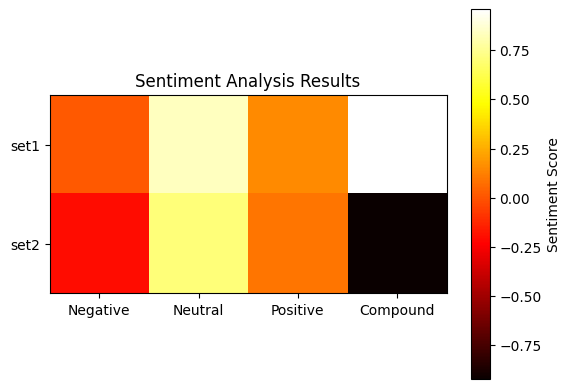

In [ ]:
#Create Heatmap for the results
sentiment_heatmap = np.array([[0.014, 0.836 , 0.151 , 0.9571],[-0.2 , 0.703, 0.097 , -0.9214]])
texts = ['set1', 'set2']
sentiments = ['Negative', 'Neutral', 'Positive', 'Compound']

plt.imshow(sentiment_heatmap, cmap='hot', interpolation='nearest')
plt.colorbar(label='Sentiment Score')
plt.xticks(np.arange(len(sentiments)), sentiments)
plt.yticks(np.arange(len(texts)), texts)
plt.title('Sentiment Analysis Results')
plt.show()